# Evaluation of national high school exam scores 2024
*How do the subject scores this year compare to last year?*

*Distribution of exam scores by groups A, A1, B, C, D?*

*Distribution of scores by region?*

#**GOAL**
*The purpose of this project is to explore the fluctuations in scores based on the collected data from the 2024 National High School Exam. Additionally, it aims to compare the score distributions across different subjects, exam groups, and regions. By utilizing Python for analysis, the objective of this project is to provide students with an overview of the scoring trends in different regions and exam groups, helping them make informed decisions about selecting a university that aligns with their personal aspirations.*

#**Set up**

## **1. Prepare Data**

In [ ]:
# Modules I'll use
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy
import sklearn
# Load dataset
print('Setup complete!')

Setup complete!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# read in all our data
data_2024 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data_Source/diem_thi_thpt_2024.csv', dtype=str)
data_2023 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data_Source/diem_thi_thpt_2023.csv', dtype=str)
data_2022 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data_Source/diem_thi_thpt_2022.csv', dtype=str)
data_2020_2021 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data_Source/diem_thi_2020_2021.csv', dtype=str)
code_province = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data_Source/Mã tỉnh.csv', dtype=str)

## **2. Data Cleaning**

#### 2.1 Data type, Null values, Duplicate values

In [ ]:
# Đổi tên các cột bằng phương thức rename
data_2020_2021 = data_2020_2021.rename(columns={
    'SBD': 'sbd',
    'Toán': 'toan',
    'Văn': 'ngu_van',
    'Ngoại Ngữ': 'ngoai_ngu',
    'Lý': 'vat_li',
    'Hoá': 'hoa_hoc',
    'Sinh': 'sinh_hoc',
    'Lịch Sử': 'lich_su',
    'Địa Lý': 'dia_li',
    'GDCD': 'gdcd',
    'Year': 'year',
    'province':'ten_tinh_thanh'
})
# Chỉnh, xóa, sửa, thêm cột
data_2020_2021['ma_ngoai_ngu'] = 'None'
data_2020_2021['ma_tinh'] = data_2020_2021['sbd'].str[:2]
data_2020_2021 = data_2020_2021[['sbd','toan','ngu_van','ngoai_ngu','vat_li','hoa_hoc','sinh_hoc','lich_su','dia_li','gdcd','ma_ngoai_ngu','year','ma_tinh','ten_tinh_thanh']]
data_2020_2021['ten_tinh_thanh'] = data_2020_2021['ten_tinh_thanh'].str.upper()
data_2020_2021.sort_values(by='sbd', ascending=True).head(2)



sbd toan ngu_van ngoai_ngu vat_li hoa_hoc sinh_hoc lich_su  \
870577  01000001  2.2     3.5       NaN    NaN     NaN      NaN     2.5   
173247  01000001  7.0     6.0       NaN    NaN     NaN      NaN     8.0   

       dia_li gdcd ma_ngoai_ngu  year ma_tinh ten_tinh_thanh  
870577    5.5  NaN         None  2021      01         HÀ NỘI  
173247    NaN  NaN         None  2020      01         HÀ NỘI

In [ ]:
data_2022.sort_values(by='sbd', ascending=True).head(2) # Check data

sbd toan ngu_van ngoai_ngu vat_li hoa_hoc sinh_hoc lich_su dia_li  \
0  01000001  3.6     5.0       4.0    NaN     NaN      NaN    2.75    6.0   
1  01000002  8.4    6.75       7.6    NaN     NaN      NaN     8.5    7.5   

   gdcd  
0  8.75  
1  8.25

In [ ]:
data_2023.sort_values(by='sbd', ascending=True).head(2) # Check data

sbd toan ngu_van ngoai_ngu vat_li hoa_hoc sinh_hoc lich_su dia_li  \
0  01000001  8.4     8.5       9.2    NaN     NaN      NaN    6.75    6.0   
1  01000002  7.2     8.5       9.2    NaN     NaN      NaN    8.75    6.5   

  gdcd ma_ngoai_ngu  
0  9.0           N1  
1  8.5           N1

In [ ]:
data_2024.sort_values(by='sbd', ascending=True).head(2) # Check data

sbd toan ngu_van ngoai_ngu vat_li hoa_hoc sinh_hoc lich_su dia_li  \
0  01000001  8.4    6.75       8.0    6.0    5.25      5.0     NaN    NaN   
1  01000002  8.6     8.5       7.2    NaN     NaN      NaN    7.25    6.0   

  gdcd ma_ngoai_ngu  
0  NaN           N1  
1  8.0           N1

In [ ]:
def map_province(data, code):
    if 'sbd' in data.columns:
        data['ma_tinh'] = data['sbd'].str[:2].str.strip()  # Trích xuất sbd và cleanup space
        code['ma_tinh'] = code['ma_tinh'].str.strip()      # Clean up any spaces
        data = pd.merge(data, code, on='ma_tinh', how='left')  # Gộp data
        data['ten_tinh_thanh'] = data['ten_tinh_thanh'].str.strip().replace({
        'BÀ RỊA -VŨNG TÀU': 'BÀ RỊA - VŨNG TÀU',
        'BÀ RỊA – VŨNG TÀU': 'BÀ RỊA - VŨNG TÀU',
        'THỪA THIÊN HUẾ': 'THỪA THIÊN - HUẾ',
        'HỒ CHÍ MINH': 'TP. HỒ CHÍ MINH'
    }, regex=True)

        data['ten_tinh_thanh'] = data['ten_tinh_thanh'].str.strip()
        print(data.head(2))  # Check data
        return data  # Trả về data
    else:
        print('Your columns are not appearing in the dataframe. Please check your data!')
        return None  # Trả về None khi xảy ra lỗi

In [ ]:
data_2022['ma_ngoai_ngu'] = 'None'
data_2022['year'] = '2022'
data_2023['year'] = '2023'
data_2024['year'] = '2024'

In [ ]:
# Áp dụng def
data_2022 = map_province(data_2022, code_province)
data_2023 = map_province(data_2023, code_province)
data_2024 = map_province(data_2024, code_province)

        sbd toan ngu_van ngoai_ngu vat_li hoa_hoc sinh_hoc lich_su dia_li  \
0  01000001  3.6     5.0       4.0    NaN     NaN      NaN    2.75    6.0   
1  01000002  8.4    6.75       7.6    NaN     NaN      NaN     8.5    7.5   

   gdcd ma_ngoai_ngu  year ma_tinh ten_tinh_thanh  
0  8.75         None  2022      01         HÀ NỘI  
1  8.25         None  2022      01         HÀ NỘI  
        sbd toan ngu_van ngoai_ngu vat_li hoa_hoc sinh_hoc lich_su dia_li  \
0  01000001  8.4     8.5       9.2    NaN     NaN      NaN    6.75    6.0   
1  01000002  7.2     8.5       9.2    NaN     NaN      NaN    8.75    6.5   

  gdcd ma_ngoai_ngu  year ma_tinh ten_tinh_thanh  
0  9.0           N1  2023      01         HÀ NỘI  
1  8.5           N1  2023      01         HÀ NỘI  
        sbd toan ngu_van ngoai_ngu vat_li hoa_hoc sinh_hoc lich_su dia_li  \
0  01000001  8.4    6.75       8.0    6.0    5.25      5.0     NaN    NaN   
1  01000002  8.6     8.5       7.2    NaN     NaN      NaN    7.25    6.0

In [ ]:
# Merge lại các sheet
data_concat = pd.concat([data_2020_2021,data_2022,data_2023,data_2024], ignore_index=True)


In [ ]:
data_concat.to_csv('data_concat.csv', index=False)

In [ ]:
data_concat.head() # Check

sbd toan ngu_van ngoai_ngu vat_li hoa_hoc sinh_hoc lich_su dia_li  \
0  18014547  6.4    6.75       4.2    NaN     NaN      NaN    4.75    7.0   
1  18014530  7.6     6.0       2.8    NaN     NaN      NaN    3.75   7.75   
2  18014521  4.8    4.75       NaN    NaN     NaN      NaN     4.0    6.5   
3  18014517  8.0     7.0       5.8    NaN     NaN      NaN    8.25    8.0   
4  18014523  8.2     6.5       4.0    8.0     8.5      5.0     NaN    NaN   

   gdcd ma_ngoai_ngu  year ma_tinh ten_tinh_thanh  
0   6.5         None  2020      18      BẮC GIANG  
1  7.75         None  2020      18      BẮC GIANG  
2   NaN         None  2020      18      BẮC GIANG  
3   9.5         None  2020      18      BẮC GIANG  
4   NaN         None  2020      18      BẮC GIANG

In [ ]:
data_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4936983 entries, 0 to 4936982
Data columns (total 14 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   sbd             object
 1   toan            object
 2   ngu_van         object
 3   ngoai_ngu       object
 4   vat_li          object
 5   hoa_hoc         object
 6   sinh_hoc        object
 7   lich_su         object
 8   dia_li          object
 9   gdcd            object
 10  ma_ngoai_ngu    object
 11  year            object
 12  ma_tinh         object
 13  ten_tinh_thanh  object
dtypes: object(14)
memory usage: 527.3+ MB


## **3. Analyze & Visualization**


### **3.1 Over view**

In [ ]:
data_concat['year'] = data_concat['year'].astype(str)

data_concat['year'].unique()

array(['2020', '2021', '2022', '2023', '2024'], dtype=object)

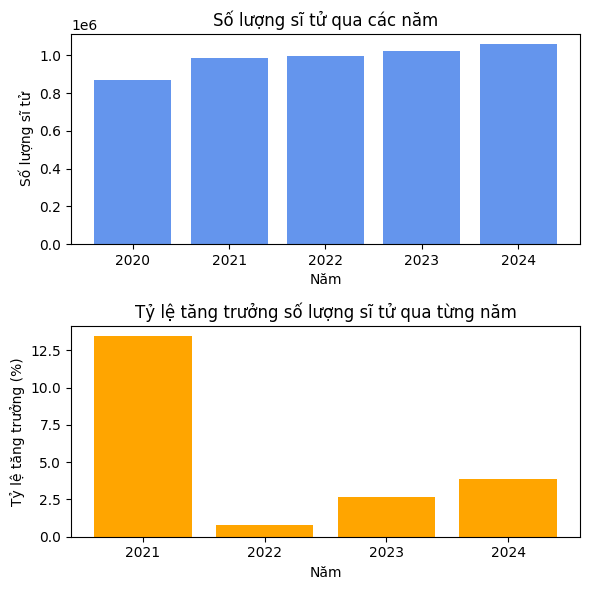

In [ ]:
import matplotlib.pyplot as plt

data = data_concat

# Đếm số lượng sĩ tử theo từng năm
student_per_year = data["year"].value_counts().sort_index()

# Tính tỷ lệ tăng trưởng theo phần trăm
growth_rate = student_per_year.pct_change() * 100

# Tạo DataFrame với số lượng sĩ tử và tỷ lệ tăng trưởng
df_growth = pd.DataFrame({
    "Số lượng sĩ tử": student_per_year,
    "Tỷ lệ tăng trưởng (%)": growth_rate
}).reset_index().rename(columns={"index": "year"})

# Thay thế giá trị NaN bằng 0 trong cột tỷ lệ tăng trưởng
df_growth['Tỷ lệ tăng trưởng (%)'] = df_growth['Tỷ lệ tăng trưởng (%)'].fillna(0)

# Tạo figure và axes cho biểu đồ
fig, ax = plt.subplots(2, 1, figsize=(6, 6))

# Màu sắc của các cột trong biểu đồ
bar_color = ["cornflowerblue", "orange"]

# Vẽ biểu đồ cho số lượng sĩ tử qua các năm
ax[0].bar(df_growth['year'], df_growth['Số lượng sĩ tử'], color=bar_color[0])
ax[0].set_ylabel('Số lượng sĩ tử')
ax[0].set_xlabel('Năm')
ax[0].set_title('Số lượng sĩ tử qua các năm')
ax[0].grid(False)

df_growth['year'] = df_growth['year'].astype(int)
df_filtered = df_growth[(df_growth['year'] >= 2021) & (df_growth['Tỷ lệ tăng trưởng (%)'] >0)]


ax[1].bar(df_filtered['year'], df_filtered['Tỷ lệ tăng trưởng (%)'], color=bar_color[1])
ax[1].set_ylabel('Tỷ lệ tăng trưởng (%)')
ax[1].set_xlabel('Năm')
ax[1].set_title('Tỷ lệ tăng trưởng số lượng sĩ tử qua từng năm')
ax[1].grid(False)

ax[1].set_xticks(df_filtered['year'])  # Chỉ định các giá trị x mong muốn
ax[1].set_xticklabels(df_filtered['year'].astype(int))  # Đảm bảo nhãn là số nguyên

# Tự động điều chỉnh khoảng cách giữa các biểu đồ
plt.tight_layout()
plt.show()


*Conclusion: In summary, I can conclude that the number of students in 2024 has increased significantly compared to previous years, with no signs of decline. The assumption is that this increase could be due to 2024 being a year completely unaffected by COVID-19, leading to a surge in the number of candidates from previous years.*

### **3.2 Average subject score**

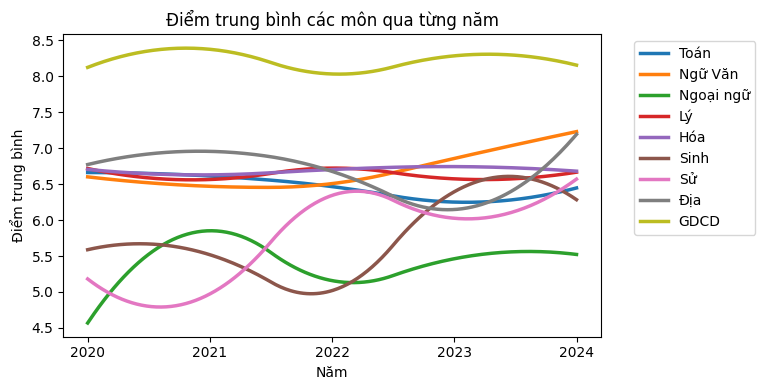

In [ ]:
import numpy as np
from scipy.interpolate import make_interp_spline

# Xử lí các giá trị thiếu số
df = data_concat  # tạo df khác tránh df gốc bị chuyển đổi
df['year'] = pd.to_numeric(df['year'], errors='coerce')
# Đặt các nhãn
xlabel_year = ['2020', '2021', '2022', '2023', '2024']
xlabel_year = [int(year) for year in xlabel_year]  # Chuyển đổi sang số
subjects = ['toan', 'ngu_van', 'ngoai_ngu', 'vat_li', 'hoa_hoc', 'sinh_hoc', 'lich_su', 'dia_li', 'gdcd']
titles = ['Toán', 'Ngữ Văn', 'Ngoại ngữ', 'Lý', 'Hóa', 'Sinh', 'Sử', 'Địa', 'GDCD']

# Chuyển dữ liệu cột subject sang số
for subject in subjects:
    df[subject] = pd.to_numeric(df[subject], errors='coerce')

mean_score_by_year = df.groupby('year')[subjects].mean().reset_index()

# Tạo size
plt.figure(figsize=(8, 4))

for subject in subjects:
    x = mean_score_by_year['year']
    y = mean_score_by_year[subject]

    # Tạo đường nội suy
    x_new = np.linspace(x.min(), x.max(), 300)
    spline = make_interp_spline(x, y, k=2)
    y_smooth = spline(x_new)

    # Vẽ va làm mịn
    plt.plot(x_new, y_smooth, label=titles[subjects.index(subject)], linewidth=2.5, alpha=1)

# Đặt tên
plt.title('Điểm trung bình các môn qua từng năm')
plt.xlabel('Năm')
plt.ylabel('Điểm trung bình')
plt.xticks(xlabel_year)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.grid(False)
plt.tight_layout()
plt.show()

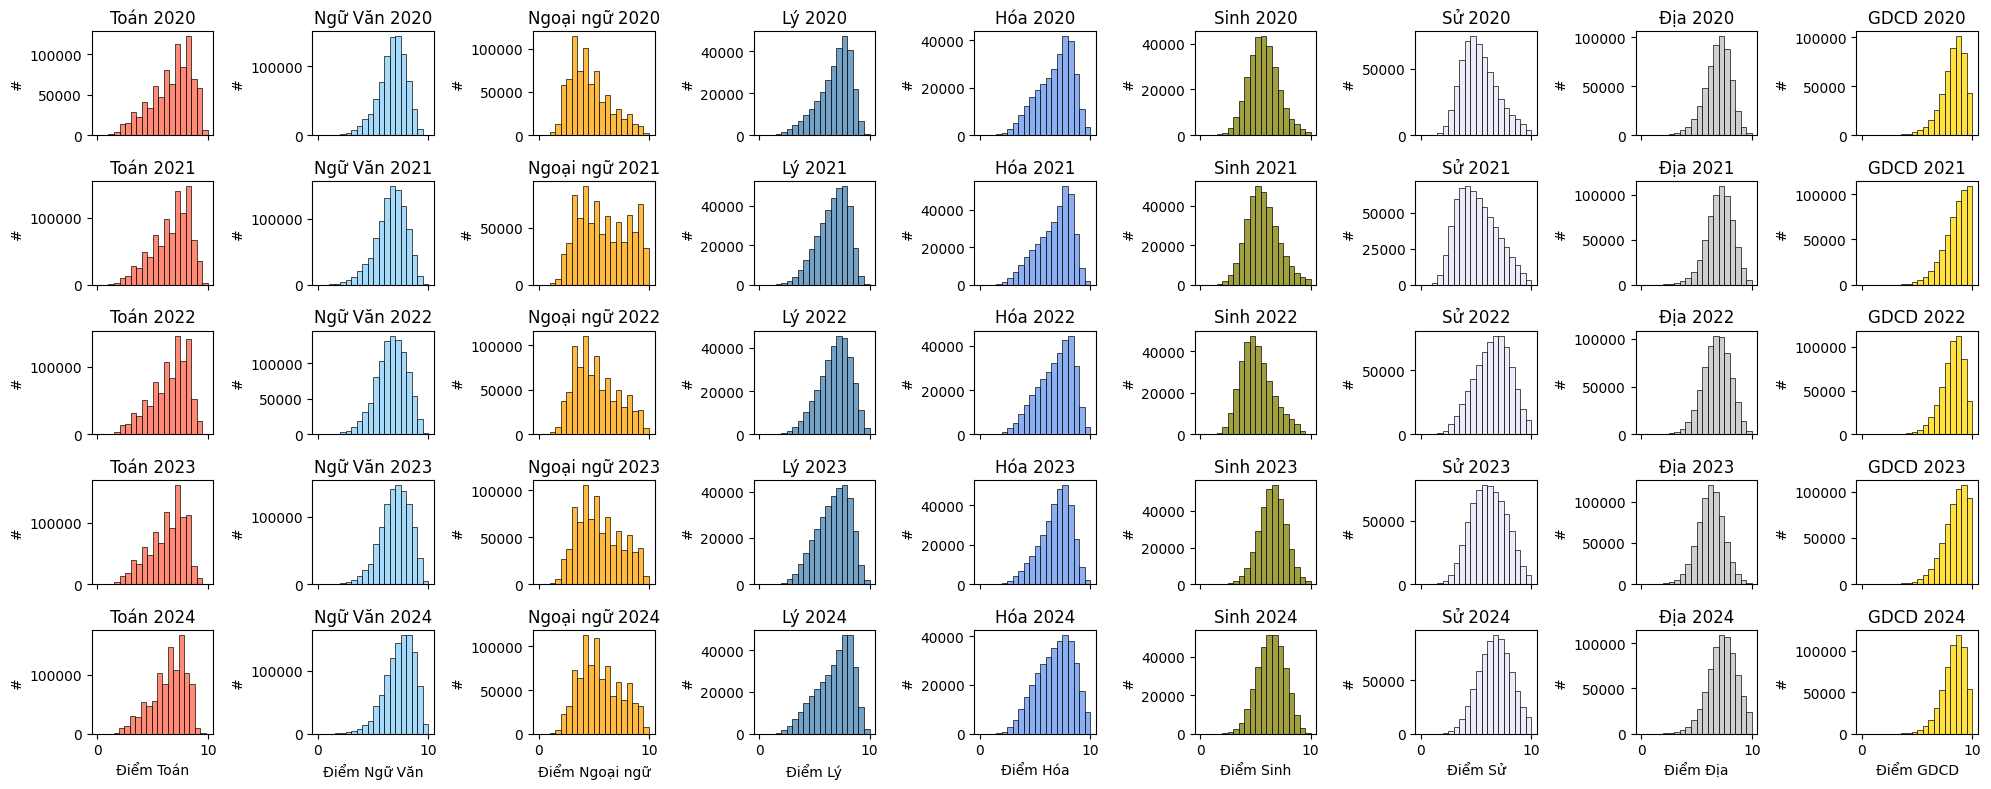

In [ ]:
import seaborn as sns

# Giả sử 'data_concat' đã được định nghĩa trước
data = data_concat

data['year'] = pd.to_numeric(data['year'])

# Lấy 5 năm gần đây nhất
recent_years = data[data['year'].isin(data['year'].unique()[-5:])]

# Tạo khung biểu đồ
fig, axes = plt.subplots(5, 9, figsize=(20, 8), sharex=True)

subjects = ['toan', 'ngu_van', 'ngoai_ngu', 'vat_li', 'hoa_hoc', 'sinh_hoc', 'lich_su', 'dia_li', 'gdcd']
titles = ['Toán', 'Ngữ Văn', 'Ngoại ngữ', 'Lý', 'Hóa', 'Sinh', 'Sử', 'Địa', 'GDCD']

# Màu sắc
colors = ['tomato', 'lightskyblue', 'orange', 'steelblue', 'cornflowerblue', 'olive', 'lavender', 'silver', 'gold']

# Sắp xếp các năm gần đây
recent_years_sorted = sorted(recent_years['year'].unique())

# Vòng lặp qua các năm và môn học
for i, year in enumerate(recent_years_sorted):
    for j, (subject, color) in enumerate(zip(subjects, colors)):
        sns.histplot(recent_years[recent_years['year'] == year][subject], bins=20, kde=False, ax=axes[i, j], edgecolor='black', color=color)
        axes[i, j].set_title(f'{titles[j]} {year}')
        axes[i, j].set_xlabel(f'Điểm {titles[j]}')
        axes[i, j].set_ylabel(f'#')

plt.tight_layout()
plt.show()


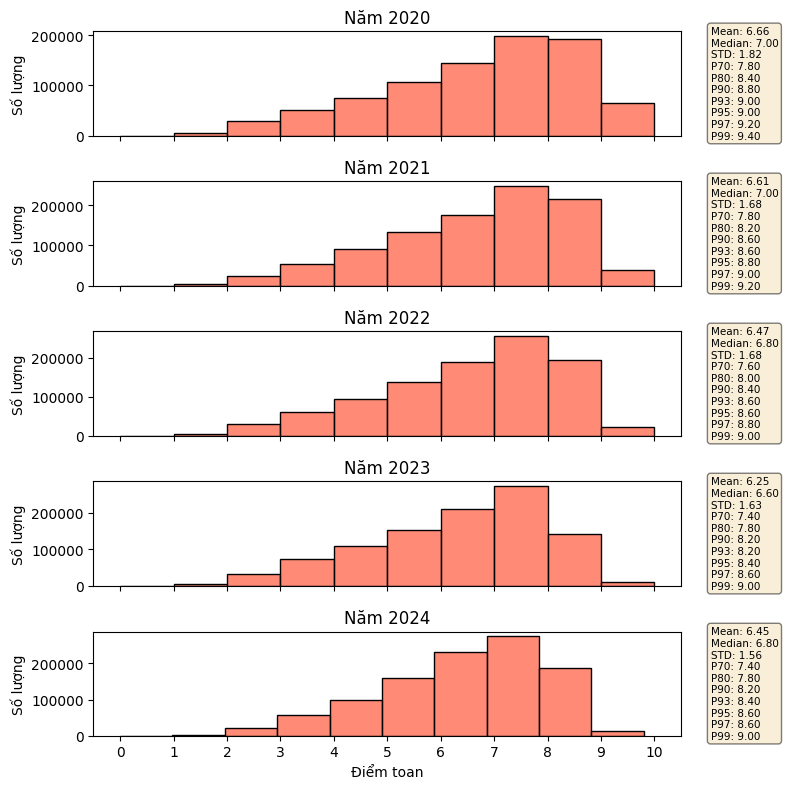

In [ ]:
import seaborn as sns

# tạo biến mới để tránh data gốc bị sửa đổi
data = data_concat

sub = 'toan'
data['year'] = pd.to_numeric(data['year'])

# Lấy 5 năm gần đây nhất
recent_years = data[data['year'].isin(data['year'].unique()[-5:])]

score = list(range(0, 11, 1))

# Tạo khung biểu đồ
fig, axs = plt.subplots(5, 1, figsize=(8, 8), sharex=True)

# Sắp xếp các năm gần đây
recent_years_sorted = sorted(recent_years['year'].unique())

# Vòng lặp qua các năm
for i, year in enumerate(recent_years_sorted):
    sns.histplot(recent_years[recent_years['year'] == year][sub], bins=10, kde=False, ax=axs[i], edgecolor='black', color='tomato')
    axs[i].set_title(f'Năm {year}')
    axs[i].set_xlabel(f'Điểm {sub}')
    axs[i].set_ylabel('Số lượng')

    # Tính toán các thông số thống kê
    year_data = recent_years[recent_years['year'] == year]['toan'].dropna()
    mean = year_data.mean()
    median = year_data.median()
    std_dev = year_data.std()

    p70 = year_data.quantile(0.70)
    p80 = year_data.quantile(0.80)
    p90 = year_data.quantile(0.90)
    p93 = year_data.quantile(0.93)
    p95 = year_data.quantile(0.95)
    p97 = year_data.quantile(0.97)
    p99 = year_data.quantile(0.99)

    # Hiển thị thông tin thống kê trên biểu đồ
    text_str = (f'Mean: {mean:.2f}\nMedian: {median:.2f}\nSTD: {std_dev:.2f}\n'
                f'P70: {p70:.2f}\nP80: {p80:.2f}\n'
                f'P90: {p90:.2f}\nP93: {p93:.2f}\nP95: {p95:.2f}\nP97: {p97:.2f}\nP99: {p99:.2f}')
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    axs[i].text(1.05, 0.5, text_str, transform=axs[i].transAxes, fontsize=7.5,
                verticalalignment='center', horizontalalignment='left', bbox=props)

plt.xticks(score)
plt.tight_layout()
plt.show()


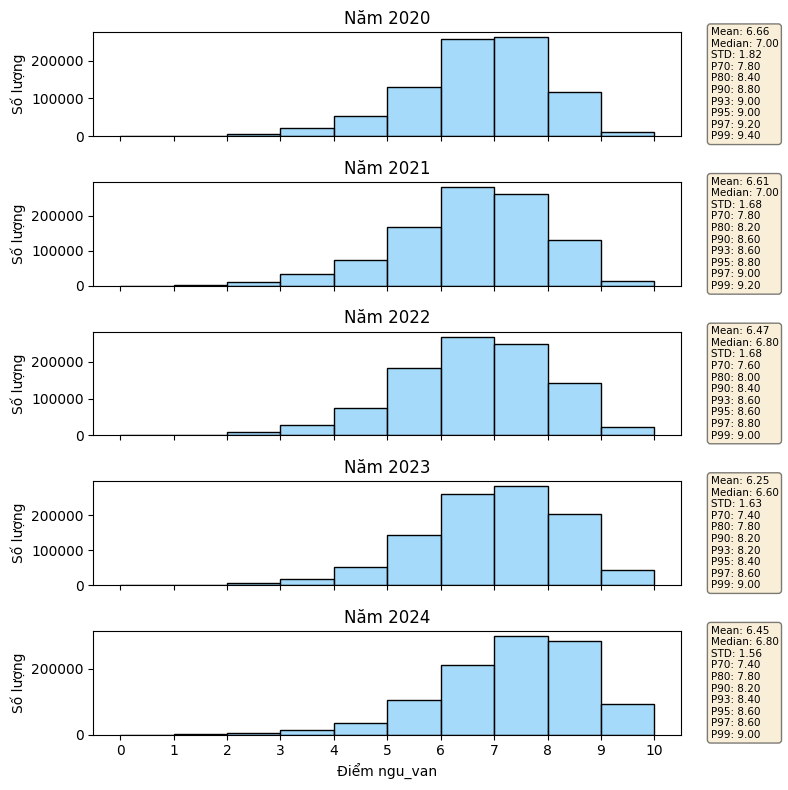

In [ ]:
import seaborn as sns

# tạo biến mới để tránh data gốc bị sửa đổi
data = data_concat

sub = 'ngu_van'
data['year'] = pd.to_numeric(data['year'])

# Lấy 5 năm gần đây nhất
recent_years = data[data['year'].isin(data['year'].unique()[-5:])]

score = list(range(0, 11, 1))

# Tạo khung biểu đồ
fig, axs = plt.subplots(5, 1, figsize=(8, 8), sharex=True)

# Sắp xếp các năm gần đây
recent_years_sorted = sorted(recent_years['year'].unique())

# Vòng lặp qua các năm
for i, year in enumerate(recent_years_sorted):
    sns.histplot(recent_years[recent_years['year'] == year][sub], bins=10, kde=False, ax=axs[i], edgecolor='black', color='lightskyblue')
    axs[i].set_title(f'Năm {year}')
    axs[i].set_xlabel(f'Điểm {sub}')
    axs[i].set_ylabel('Số lượng')

    # Tính toán các thông số thống kê
    year_data = recent_years[recent_years['year'] == year]['toan'].dropna()
    mean = year_data.mean()
    median = year_data.median()
    std_dev = year_data.std()

    p70 = year_data.quantile(0.70)
    p80 = year_data.quantile(0.80)
    p90 = year_data.quantile(0.90)
    p93 = year_data.quantile(0.93)
    p95 = year_data.quantile(0.95)
    p97 = year_data.quantile(0.97)
    p99 = year_data.quantile(0.99)

    # Hiển thị thông tin thống kê trên biểu đồ
    text_str = (f'Mean: {mean:.2f}\nMedian: {median:.2f}\nSTD: {std_dev:.2f}\n'
                f'P70: {p70:.2f}\nP80: {p80:.2f}\n'
                f'P90: {p90:.2f}\nP93: {p93:.2f}\nP95: {p95:.2f}\nP97: {p97:.2f}\nP99: {p99:.2f}')
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    axs[i].text(1.05, 0.5, text_str, transform=axs[i].transAxes, fontsize=7.5,
                verticalalignment='center', horizontalalignment='left', bbox=props)

plt.xticks(score)
plt.tight_layout()
plt.show()


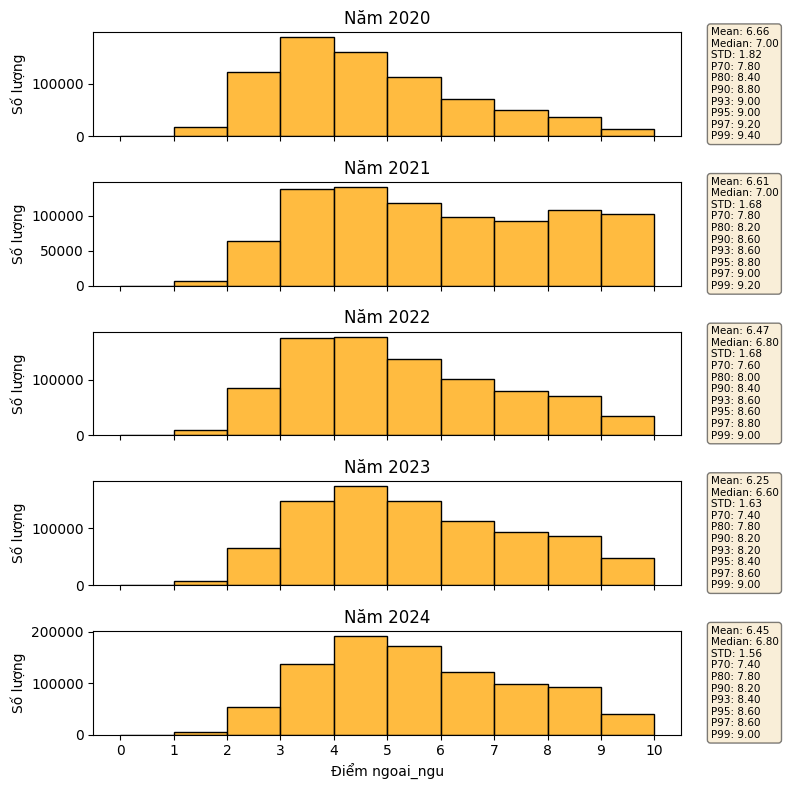

In [ ]:
import seaborn as sns

# tạo biến mới để tránh data gốc bị sửa đổi
data = data_concat

sub = 'ngoai_ngu'
data['year'] = pd.to_numeric(data['year'])

# Lấy 5 năm gần đây nhất
recent_years = data[data['year'].isin(data['year'].unique()[-5:])]

score = list(range(0, 11, 1))

# Tạo khung biểu đồ
fig, axs = plt.subplots(5, 1, figsize=(8, 8), sharex=True)

# Sắp xếp các năm gần đây
recent_years_sorted = sorted(recent_years['year'].unique())

# Vòng lặp qua các năm
for i, year in enumerate(recent_years_sorted):
    sns.histplot(recent_years[recent_years['year'] == year][sub], bins=10, kde=False, ax=axs[i], edgecolor='black', color='orange')
    axs[i].set_title(f'Năm {year}')
    axs[i].set_xlabel(f'Điểm {sub}')
    axs[i].set_ylabel('Số lượng')

    # Tính toán các thông số thống kê
    year_data = recent_years[recent_years['year'] == year]['toan'].dropna()
    mean = year_data.mean()
    median = year_data.median()
    std_dev = year_data.std()

    p70 = year_data.quantile(0.70)
    p80 = year_data.quantile(0.80)
    p90 = year_data.quantile(0.90)
    p93 = year_data.quantile(0.93)
    p95 = year_data.quantile(0.95)
    p97 = year_data.quantile(0.97)
    p99 = year_data.quantile(0.99)

    # Hiển thị thông tin thống kê trên biểu đồ
    text_str = (f'Mean: {mean:.2f}\nMedian: {median:.2f}\nSTD: {std_dev:.2f}\n'
                f'P70: {p70:.2f}\nP80: {p80:.2f}\n'
                f'P90: {p90:.2f}\nP93: {p93:.2f}\nP95: {p95:.2f}\nP97: {p97:.2f}\nP99: {p99:.2f}')
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    axs[i].text(1.05, 0.5, text_str, transform=axs[i].transAxes, fontsize=7.5,
                verticalalignment='center', horizontalalignment='left', bbox=props)

plt.xticks(score)
plt.tight_layout()
plt.show()


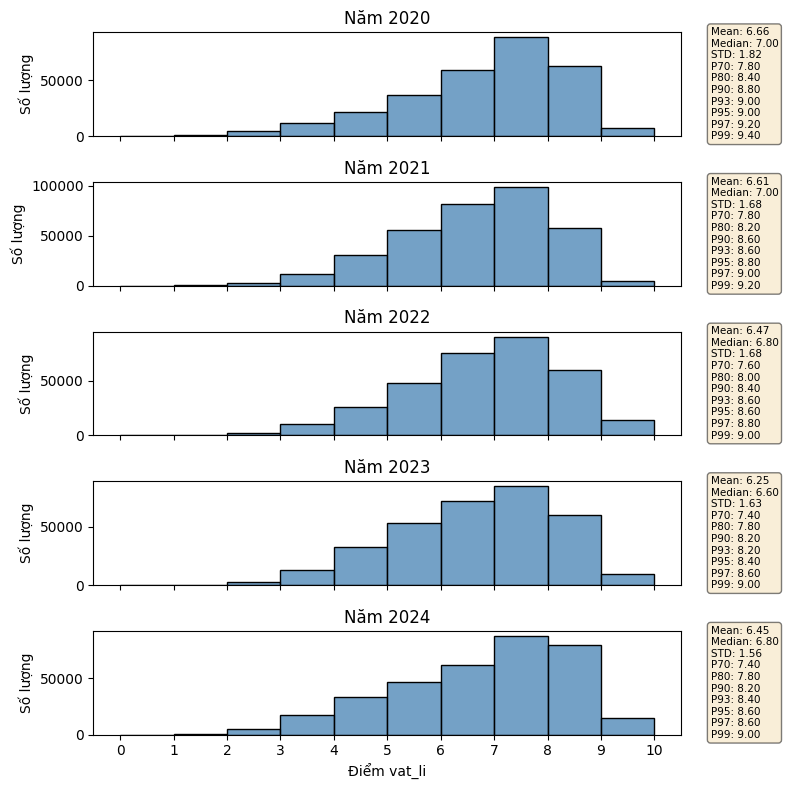

In [ ]:
import seaborn as sns

# Giả sử 'data_concat' đã được định nghĩa trước
data = data_concat

sub = 'vat_li'
data['year'] = pd.to_numeric(data['year'])

# Lấy 5 năm gần đây nhất
recent_years = data[data['year'].isin(data['year'].unique()[-5:])]

score = list(range(0, 11, 1))

# Tạo khung biểu đồ
fig, axs = plt.subplots(5, 1, figsize=(8, 8), sharex=True)

# Sắp xếp các năm gần đây
recent_years_sorted = sorted(recent_years['year'].unique())

# Vòng lặp qua các năm
for i, year in enumerate(recent_years_sorted):
    sns.histplot(recent_years[recent_years['year'] == year][sub], bins=10, kde=False, ax=axs[i], edgecolor='black', color='steelblue')
    axs[i].set_title(f'Năm {year}')
    axs[i].set_xlabel(f'Điểm {sub}')
    axs[i].set_ylabel('Số lượng')

    # Tính toán các thông số thống kê
    year_data = recent_years[recent_years['year'] == year]['toan'].dropna()
    mean = year_data.mean()
    median = year_data.median()
    std_dev = year_data.std()

    p70 = year_data.quantile(0.70)
    p80 = year_data.quantile(0.80)
    p90 = year_data.quantile(0.90)
    p93 = year_data.quantile(0.93)
    p95 = year_data.quantile(0.95)
    p97 = year_data.quantile(0.97)
    p99 = year_data.quantile(0.99)

    # Hiển thị thông tin thống kê trên biểu đồ
    text_str = (f'Mean: {mean:.2f}\nMedian: {median:.2f}\nSTD: {std_dev:.2f}\n'
                f'P70: {p70:.2f}\nP80: {p80:.2f}\n'
                f'P90: {p90:.2f}\nP93: {p93:.2f}\nP95: {p95:.2f}\nP97: {p97:.2f}\nP99: {p99:.2f}')
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    axs[i].text(1.05, 0.5, text_str, transform=axs[i].transAxes, fontsize=7.5,
                verticalalignment='center', horizontalalignment='left', bbox=props)

plt.xticks(score)
plt.tight_layout()
plt.show()


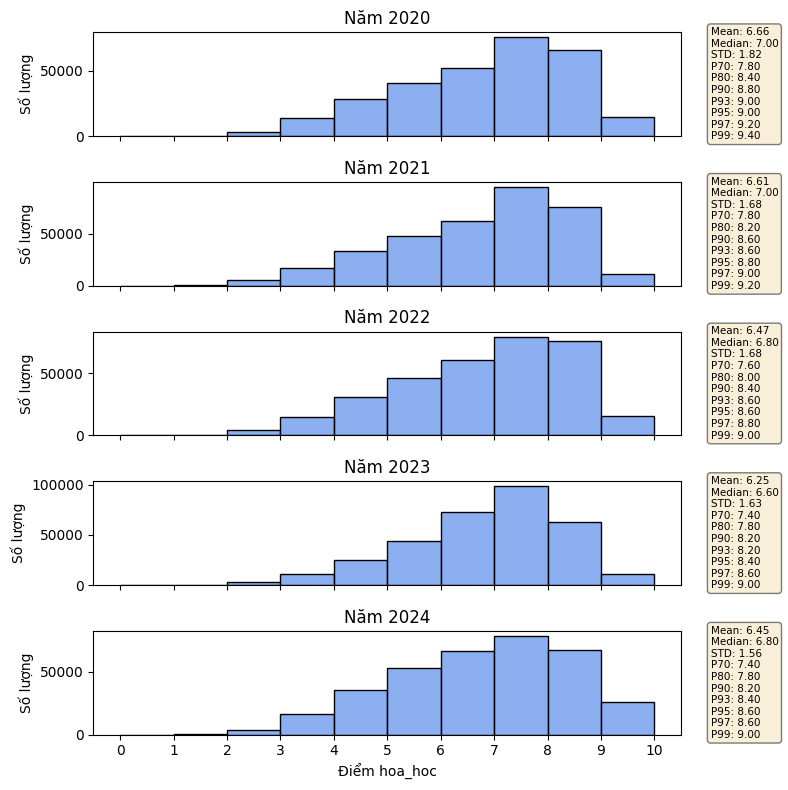

In [ ]:
import seaborn as sns

# tạo biến mới để tránh data gốc bị sửa đổi
data = data_concat

sub = 'hoa_hoc'
data['year'] = pd.to_numeric(data['year'])

# Lấy 5 năm gần đây nhất
recent_years = data[data['year'].isin(data['year'].unique()[-5:])]

score = list(range(0, 11, 1))

# Tạo khung biểu đồ
fig, axs = plt.subplots(5, 1, figsize=(8, 8), sharex=True)

# Sắp xếp các năm gần đây
recent_years_sorted = sorted(recent_years['year'].unique())

# Vòng lặp qua các năm
for i, year in enumerate(recent_years_sorted):
    sns.histplot(recent_years[recent_years['year'] == year][sub], bins=10, kde=False, ax=axs[i], edgecolor='black', color='cornflowerblue')
    axs[i].set_title(f'Năm {year}')
    axs[i].set_xlabel(f'Điểm {sub}')
    axs[i].set_ylabel('Số lượng')

    # Tính toán các thông số thống kê
    year_data = recent_years[recent_years['year'] == year]['toan'].dropna()
    mean = year_data.mean()
    median = year_data.median()
    std_dev = year_data.std()

    p70 = year_data.quantile(0.70)
    p80 = year_data.quantile(0.80)
    p90 = year_data.quantile(0.90)
    p93 = year_data.quantile(0.93)
    p95 = year_data.quantile(0.95)
    p97 = year_data.quantile(0.97)
    p99 = year_data.quantile(0.99)

    # Hiển thị thông tin thống kê trên biểu đồ
    text_str = (f'Mean: {mean:.2f}\nMedian: {median:.2f}\nSTD: {std_dev:.2f}\n'
                f'P70: {p70:.2f}\nP80: {p80:.2f}\n'
                f'P90: {p90:.2f}\nP93: {p93:.2f}\nP95: {p95:.2f}\nP97: {p97:.2f}\nP99: {p99:.2f}')
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    axs[i].text(1.05, 0.5, text_str, transform=axs[i].transAxes, fontsize=7.5,
                verticalalignment='center', horizontalalignment='left', bbox=props)

plt.xticks(score)
plt.tight_layout()
plt.show()


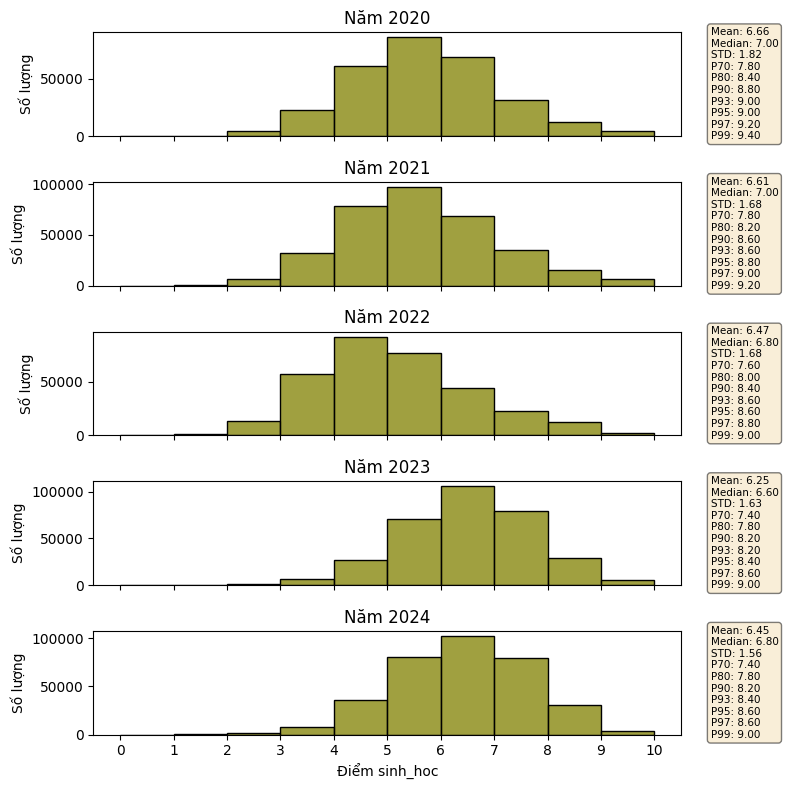

In [ ]:
import seaborn as sns

# tạo biến mới để tránh data gốc bị sửa đổi
data = data_concat

sub = 'sinh_hoc'
data['year'] = pd.to_numeric(data['year'])

# Lấy 5 năm gần đây nhất
recent_years = data[data['year'].isin(data['year'].unique()[-5:])]

score = list(range(0, 11, 1))

# Tạo khung biểu đồ
fig, axs = plt.subplots(5, 1, figsize=(8, 8), sharex=True)

# Sắp xếp các năm gần đây
recent_years_sorted = sorted(recent_years['year'].unique())

# Vòng lặp qua các năm
for i, year in enumerate(recent_years_sorted):
    sns.histplot(recent_years[recent_years['year'] == year][sub], bins=10, kde=False, ax=axs[i], edgecolor='black', color='olive')
    axs[i].set_title(f'Năm {year}')
    axs[i].set_xlabel(f'Điểm {sub}')
    axs[i].set_ylabel('Số lượng')

    # Tính toán các thông số thống kê
    year_data = recent_years[recent_years['year'] == year]['toan'].dropna()
    mean = year_data.mean()
    median = year_data.median()
    std_dev = year_data.std()

    p70 = year_data.quantile(0.70)
    p80 = year_data.quantile(0.80)
    p90 = year_data.quantile(0.90)
    p93 = year_data.quantile(0.93)
    p95 = year_data.quantile(0.95)
    p97 = year_data.quantile(0.97)
    p99 = year_data.quantile(0.99)

    # Hiển thị thông tin thống kê trên biểu đồ
    text_str = (f'Mean: {mean:.2f}\nMedian: {median:.2f}\nSTD: {std_dev:.2f}\n'
                f'P70: {p70:.2f}\nP80: {p80:.2f}\n'
                f'P90: {p90:.2f}\nP93: {p93:.2f}\nP95: {p95:.2f}\nP97: {p97:.2f}\nP99: {p99:.2f}')
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    axs[i].text(1.05, 0.5, text_str, transform=axs[i].transAxes, fontsize=7.5,
                verticalalignment='center', horizontalalignment='left', bbox=props)

plt.xticks(score)
plt.tight_layout()
plt.show()


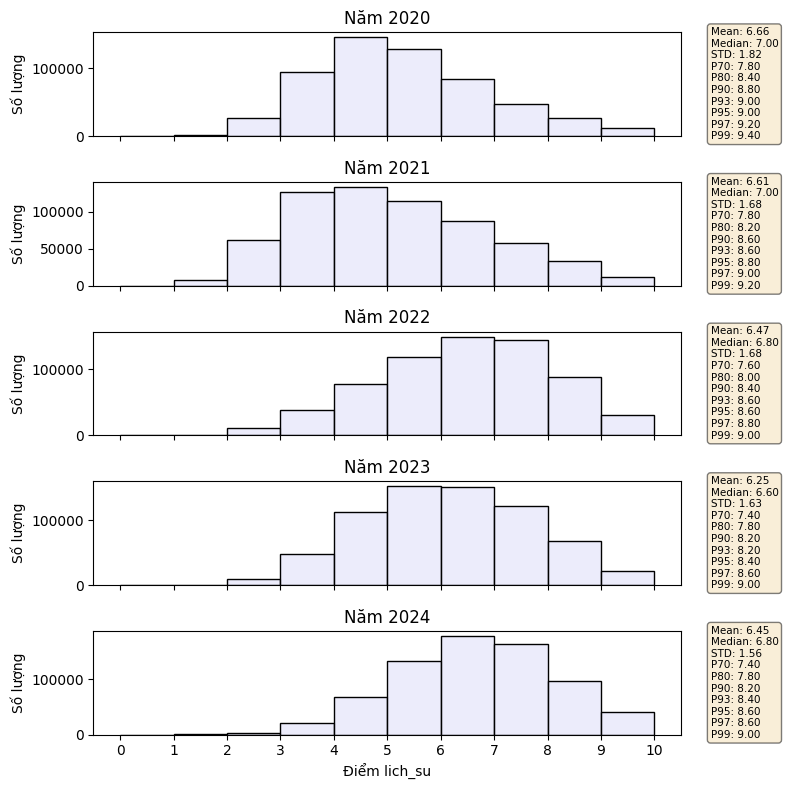

In [ ]:
import seaborn as sns

# tạo biến mới để tránh data gốc bị sửa đổi
data = data_concat

sub = 'lich_su'
data['year'] = pd.to_numeric(data['year'])

# Lấy 5 năm gần đây nhất
recent_years = data[data['year'].isin(data['year'].unique()[-5:])]

score = list(range(0, 11, 1))

# Tạo khung biểu đồ
fig, axs = plt.subplots(5, 1, figsize=(8, 8), sharex=True)

# Sắp xếp các năm gần đây
recent_years_sorted = sorted(recent_years['year'].unique())

# Vòng lặp qua các năm
for i, year in enumerate(recent_years_sorted):
    sns.histplot(recent_years[recent_years['year'] == year][sub], bins=10, kde=False, ax=axs[i], edgecolor='black', color='lavender')
    axs[i].set_title(f'Năm {year}')
    axs[i].set_xlabel(f'Điểm {sub}')
    axs[i].set_ylabel('Số lượng')

    # Tính toán các thông số thống kê
    year_data = recent_years[recent_years['year'] == year]['toan'].dropna()
    mean = year_data.mean()
    median = year_data.median()
    std_dev = year_data.std()

    p70 = year_data.quantile(0.70)
    p80 = year_data.quantile(0.80)
    p90 = year_data.quantile(0.90)
    p93 = year_data.quantile(0.93)
    p95 = year_data.quantile(0.95)
    p97 = year_data.quantile(0.97)
    p99 = year_data.quantile(0.99)

    # Hiển thị thông tin thống kê trên biểu đồ
    text_str = (f'Mean: {mean:.2f}\nMedian: {median:.2f}\nSTD: {std_dev:.2f}\n'
                f'P70: {p70:.2f}\nP80: {p80:.2f}\n'
                f'P90: {p90:.2f}\nP93: {p93:.2f}\nP95: {p95:.2f}\nP97: {p97:.2f}\nP99: {p99:.2f}')
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    axs[i].text(1.05, 0.5, text_str, transform=axs[i].transAxes, fontsize=7.5,
                verticalalignment='center', horizontalalignment='left', bbox=props)

plt.xticks(score)
plt.tight_layout()
plt.show()


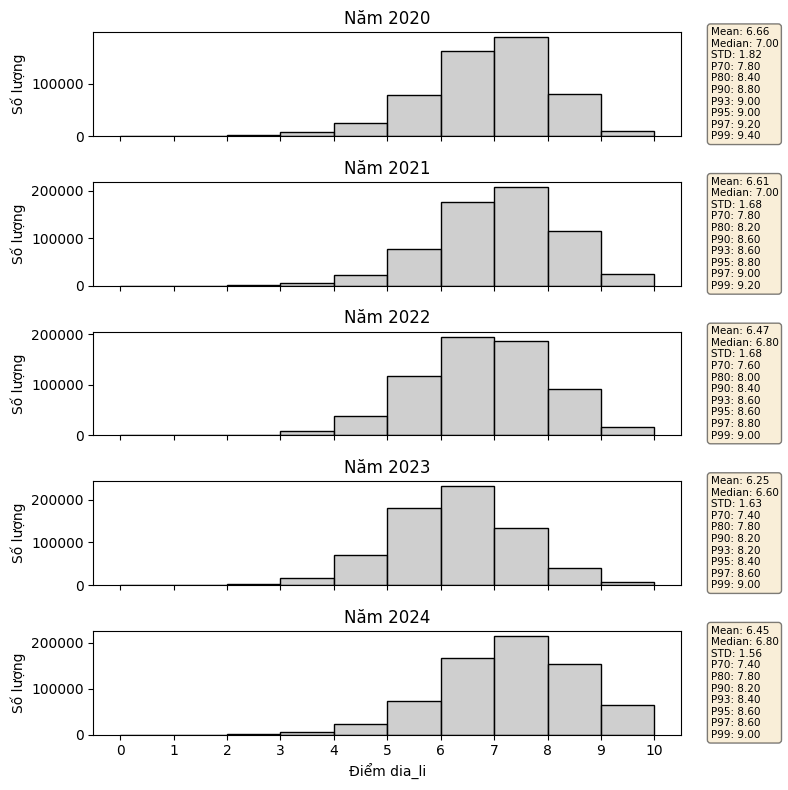

In [ ]:
import seaborn as sns

# tạo biến mới để tránh data gốc bị sửa đổi
data = data_concat

sub = 'dia_li'
data['year'] = pd.to_numeric(data['year'])

# Lấy 5 năm gần đây nhất
recent_years = data[data['year'].isin(data['year'].unique()[-5:])]

score = list(range(0, 11, 1))

# Tạo khung biểu đồ
fig, axs = plt.subplots(5, 1, figsize=(8, 8), sharex=True)

# Sắp xếp các năm gần đây
recent_years_sorted = sorted(recent_years['year'].unique())

# Vòng lặp qua các năm
for i, year in enumerate(recent_years_sorted):
    sns.histplot(recent_years[recent_years['year'] == year][sub], bins=10, kde=False, ax=axs[i], edgecolor='black', color='silver')
    axs[i].set_title(f'Năm {year}')
    axs[i].set_xlabel(f'Điểm {sub}')
    axs[i].set_ylabel('Số lượng')

    # Tính toán các thông số thống kê
    year_data = recent_years[recent_years['year'] == year]['toan'].dropna()
    mean = year_data.mean()
    median = year_data.median()
    std_dev = year_data.std()

    p70 = year_data.quantile(0.70)
    p80 = year_data.quantile(0.80)
    p90 = year_data.quantile(0.90)
    p93 = year_data.quantile(0.93)
    p95 = year_data.quantile(0.95)
    p97 = year_data.quantile(0.97)
    p99 = year_data.quantile(0.99)

    # Hiển thị thông tin thống kê trên biểu đồ
    text_str = (f'Mean: {mean:.2f}\nMedian: {median:.2f}\nSTD: {std_dev:.2f}\n'
                f'P70: {p70:.2f}\nP80: {p80:.2f}\n'
                f'P90: {p90:.2f}\nP93: {p93:.2f}\nP95: {p95:.2f}\nP97: {p97:.2f}\nP99: {p99:.2f}')
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    axs[i].text(1.05, 0.5, text_str, transform=axs[i].transAxes, fontsize=7.5,
                verticalalignment='center', horizontalalignment='left', bbox=props)

plt.xticks(score)
plt.tight_layout()
plt.show()


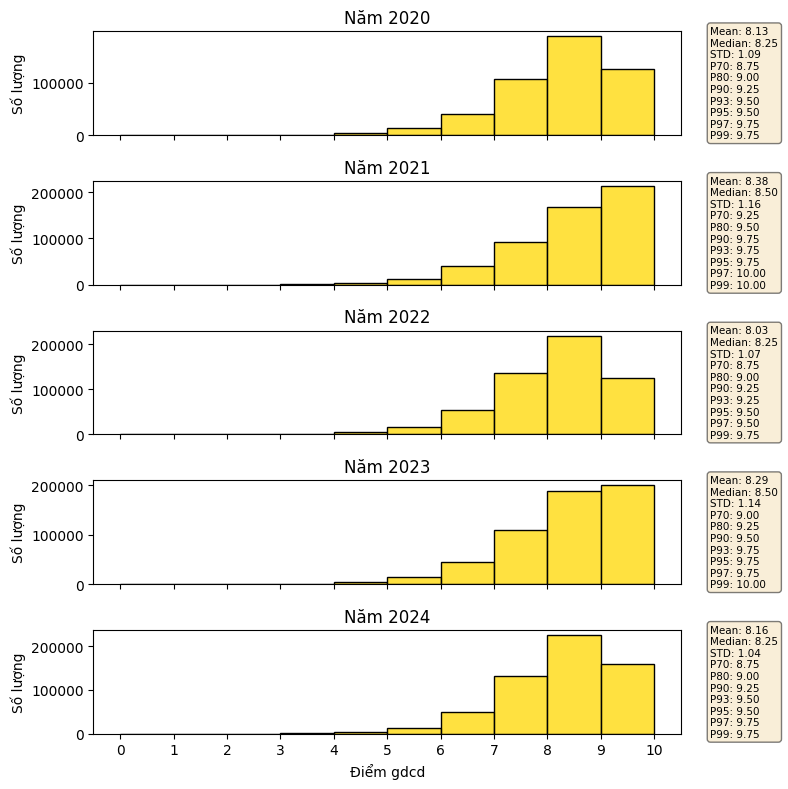

In [ ]:
import seaborn as sns

# tạo biến mới để tránh data gốc bị sửa đổi
data = data_concat

sub = 'gdcd'
data['year'] = pd.to_numeric(data['year'])

# Lấy 5 năm gần đây nhất
recent_years = data[data['year'].isin(data['year'].unique()[-5:])]

score = list(range(0, 11, 1))

# Tạo khung biểu đồ
fig, axs = plt.subplots(5, 1, figsize=(8, 8), sharex=True)
axs = axs.flat  # Sử dụng .flat để lặp qua các subplots

# Sắp xếp các năm gần đây
recent_years_sorted = sorted(recent_years['year'].unique())

# Vòng lặp qua các năm
for i, year in enumerate(recent_years_sorted):
    # Lọc dữ liệu chỉ một lần
    year_data = recent_years[recent_years['year'] == year][sub].dropna()

    # Vẽ biểu đồ histogram
    sns.histplot(year_data, bins = 10, kde=False, ax=axs[i], edgecolor='black', color='gold')
    axs[i].set_title(f'Năm {year}')
    axs[i].set_xlabel(f'Điểm {sub}')
    axs[i].set_ylabel('Số lượng')

    # Tính toán các thông số thống kê
    mean = year_data.mean()
    median = year_data.median()
    std_dev = year_data.std()

    percentiles = year_data.quantile([0.70, 0.80, 0.90, 0.93, 0.95, 0.97, 0.99])

    # Hiển thị thông tin thống kê trên biểu đồ
    text_str = (f'Mean: {mean:.2f}\nMedian: {median:.2f}\nSTD: {std_dev:.2f}\n'
                f'P70: {percentiles[0.70]:.2f}\nP80: {percentiles[0.80]:.2f}\n'
                f'P90: {percentiles[0.90]:.2f}\nP93: {percentiles[0.93]:.2f}\n'
                f'P95: {percentiles[0.95]:.2f}\nP97: {percentiles[0.97]:.2f}\nP99: {percentiles[0.99]:.2f}')
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    axs[i].text(1.05, 0.5, text_str, transform=axs[i].transAxes, fontsize=7.5,
                verticalalignment='center', horizontalalignment='left', bbox=props)

plt.xticks(score)
plt.tight_layout()
plt.show()


*Conclusion: The score percentage this year shows that for students to rank in the top 10% or higher, they need to score 0.25 to 0.5 points higher than last year in the natural science subjects. Notably, the scores in Group C subjects, including history, geography, and civic education, have increased by 1 to 2.5 points. Therefore, it can be expected that the admission scores for universities using Group C will be significantly higher than last year.*

### **3.3 Distribution of scores**

In [ ]:
# lấy ngẫu nhiên 30% dữ liệu từ DF
sample_data = data_concat.sample(frac = 0.3, random_state = 1)

In [ ]:
sample_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1481095 entries, 2201011 to 3906872
Data columns (total 14 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   sbd             1481095 non-null  object 
 1   toan            1462610 non-null  float64
 2   ngu_van         1461251 non-null  float64
 3   ngoai_ngu       1291877 non-null  float64
 4   vat_li          492325 non-null   float64
 5   hoa_hoc         494642 non-null   float64
 6   sinh_hoc        487729 non-null   float64
 7   lich_su         974308 non-null   float64
 8   dia_li          966986 non-null   float64
 9   gdcd            814805 non-null   float64
 10  ma_ngoai_ngu    1394076 non-null  object 
 11  year            1481095 non-null  int64  
 12  ma_tinh         1481095 non-null  object 
 13  ten_tinh_thanh  1481095 non-null  object 
dtypes: float64(9), int64(1), object(4)
memory usage: 169.5+ MB


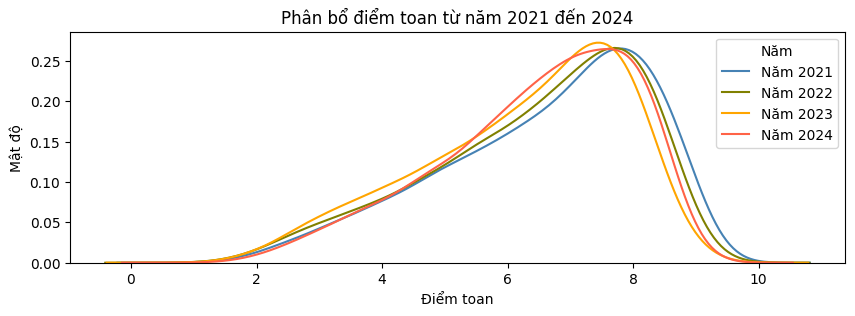

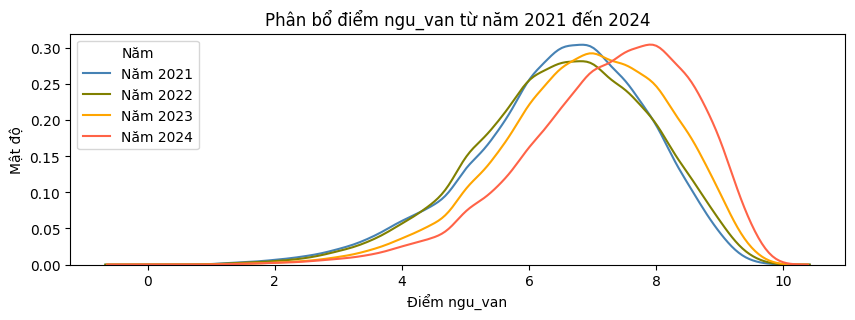

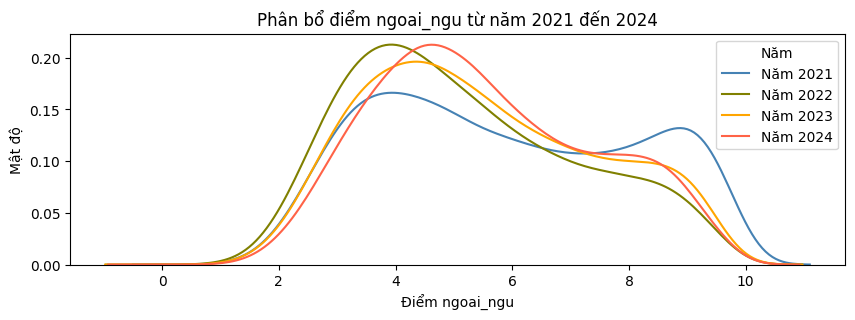

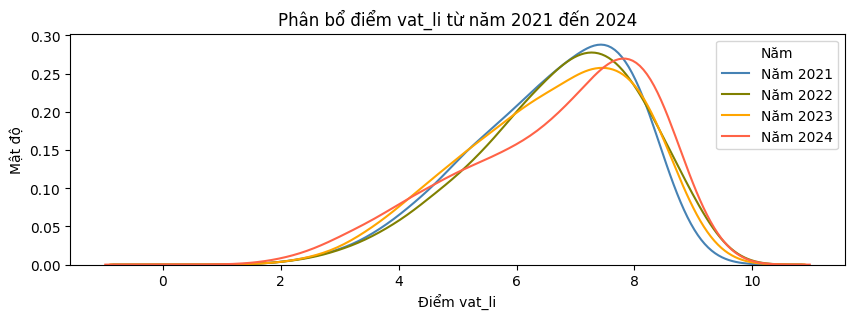

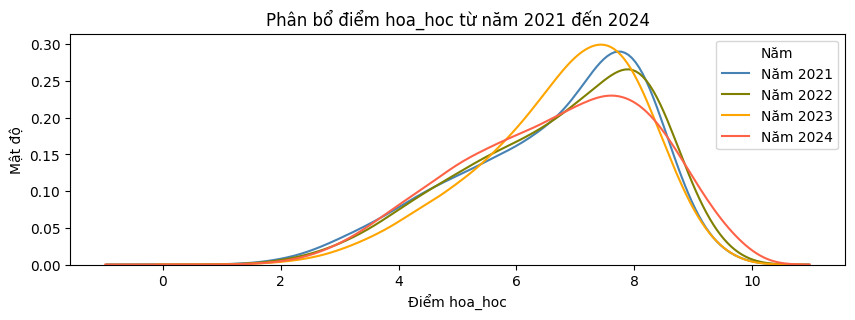

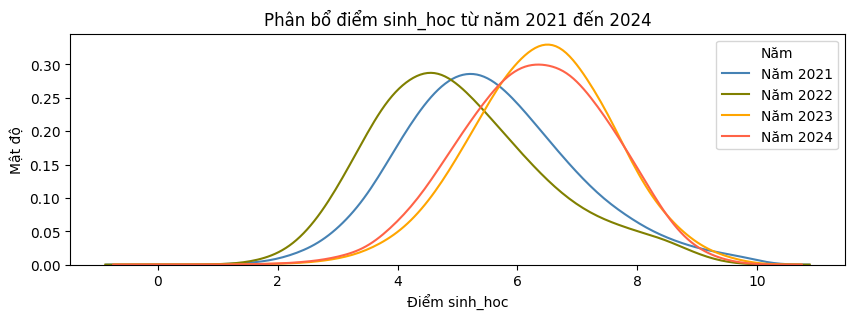

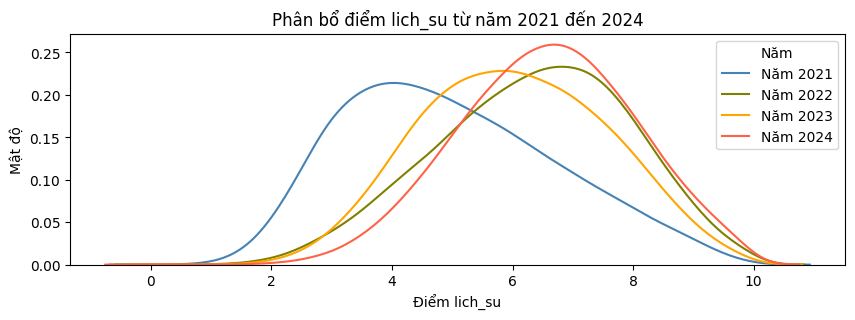

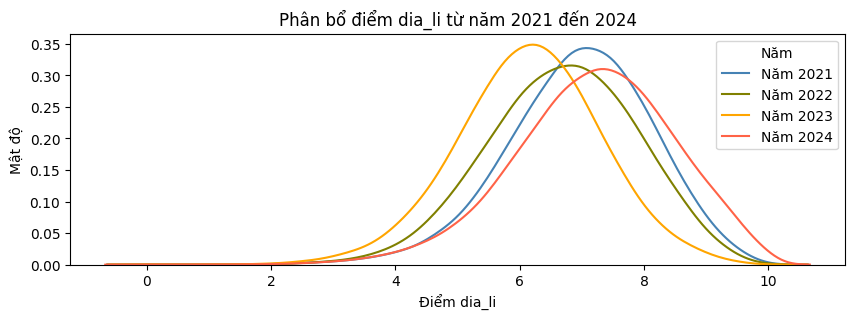

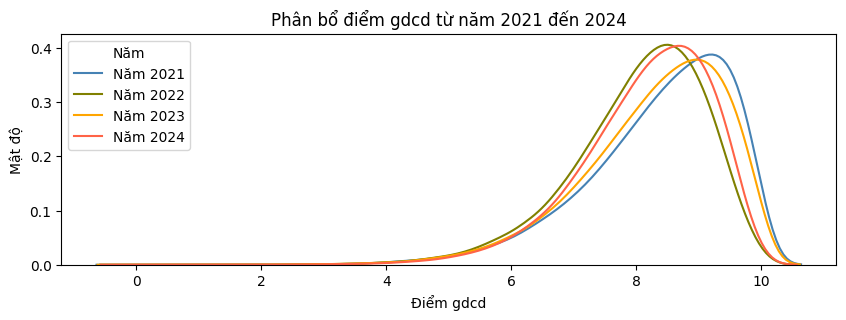

In [ ]:

import seaborn as sns
# Kiểm tra dữ liệu để đảm bảo cột year là kiểu chuỗi
sample_data['year'] = sample_data['year'].astype(str)
df_filtered = sample_data[sample_data['year'].isin(['2021', '2022', '2023', '2024'])]

subjects = ['toan', 'ngu_van', 'ngoai_ngu', 'vat_li', 'hoa_hoc', 'sinh_hoc', 'lich_su', 'dia_li', 'gdcd']
colors = ['steelblue', 'olive', 'orange', 'tomato']

# Lặp qua từng môn học
for subject in subjects:
    plt.figure(figsize=(10, 3))

    # Lặp qua từng năm và màu sắc tương ứng
    for year, color in zip(['2021', '2022', '2023', '2024'], colors):
        data = df_filtered[df_filtered['year'] == year][subject].dropna()

        # Kiểm tra nếu có dữ liệu, chỉ vẽ khi có dữ liệu hợp lệ
        if not data.empty:
            sns.kdeplot(data, label=f'Năm {year}', color=color, bw_adjust=2)

    # Cập nhật tiêu đề và nhãn trục
    plt.title(f'Phân bổ điểm {subject} từ năm 2021 đến 2024')
    plt.xlabel(f'Điểm {subject}')
    plt.ylabel('Mật độ')

    # Hiển thị chú giải nếu có nhãn hợp lệ
    plt.legend(title='Năm')
    plt.grid(False)
    plt.show()

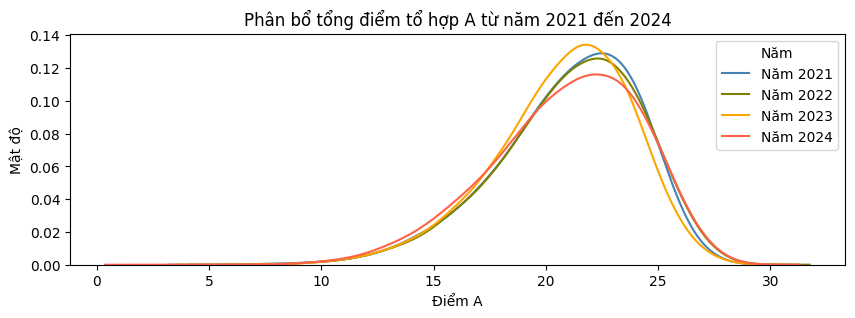

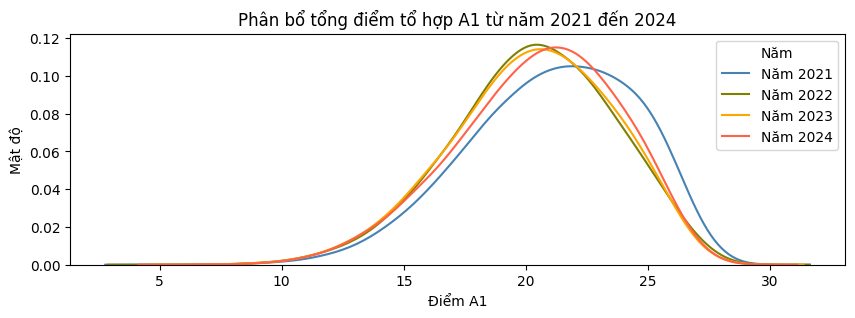

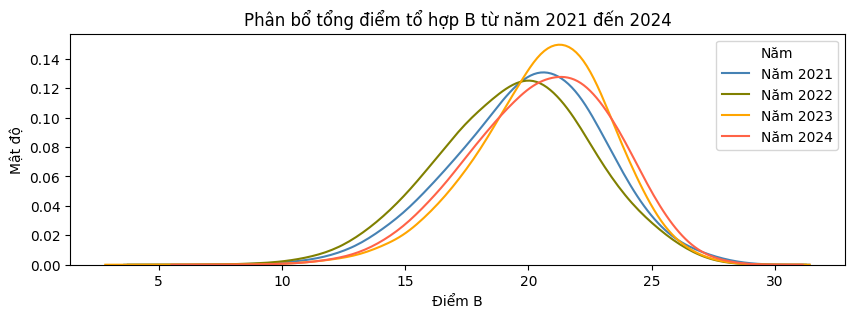

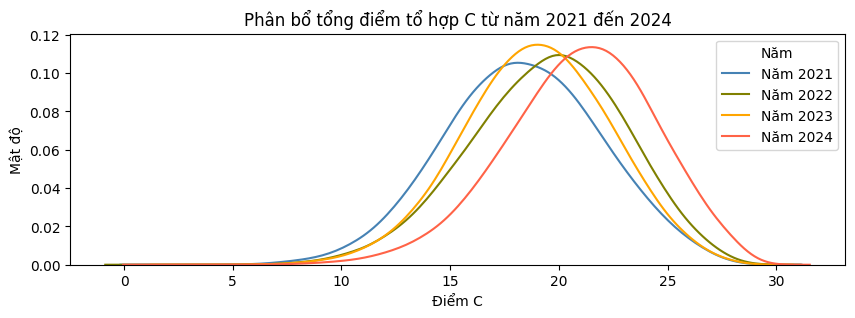

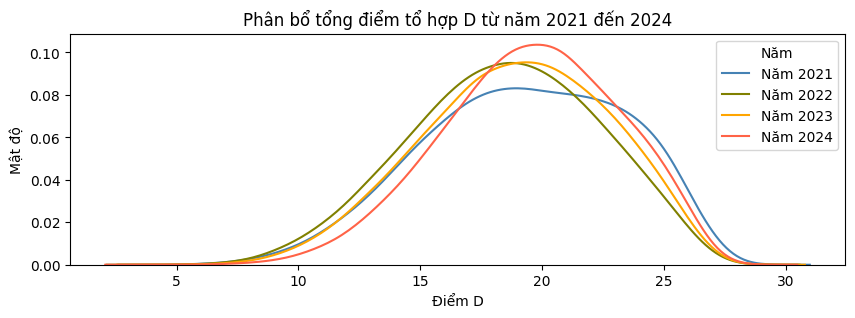

In [ ]:
df_filtered.loc[:, 'A'] = df_filtered['toan'] + df_filtered['vat_li'] + df_filtered['hoa_hoc']
df_filtered.loc[:, 'B'] = df_filtered['toan'] + df_filtered['hoa_hoc'] + df_filtered['sinh_hoc']
df_filtered.loc[:, 'C'] = df_filtered['ngu_van'] + df_filtered['lich_su'] + df_filtered['dia_li']
df_filtered.loc[:, 'D'] = df_filtered['toan'] + df_filtered['ngu_van'] + df_filtered['ngoai_ngu']
df_filtered.loc[:, 'A1'] = df_filtered['toan'] + df_filtered['vat_li'] + df_filtered['ngoai_ngu']

# Danh sách tổ hợp và màu sắc
combinations = ['A', 'A1', 'B', 'C', 'D']
colors = ['steelblue', 'olive', 'orange', 'tomato']

# Vẽ biểu đồ cho từng tổ hợp điểm
for combo in combinations:
    plt.figure(figsize=(10, 3))

    # Vòng lặp qua các năm và màu sắc tương ứng
    for year, color in zip(['2021', '2022', '2023', '2024'], colors):
        # Lọc dữ liệu cho từng năm và tổ hợp
        data = df_filtered[df_filtered['year'] == year][combo].dropna()

        # Kiểm tra nếu có dữ liệu, chỉ vẽ khi có dữ liệu hợp lệ
        if not data.empty:
            sns.kdeplot(data, label=f'Năm {year}', color=color, bw_adjust=2)

    # Cập nhật tiêu đề và nhãn trục
    plt.title(f'Phân bổ tổng điểm tổ hợp {combo} từ năm 2021 đến 2024')
    plt.xlabel(f'Điểm {combo}')
    plt.ylabel('Mật độ')

    # Hiển thị chú giải nếu có nhãn hợp lệ
    plt.legend(title='Năm')
    plt.grid(False)
    plt.show()

*It can be seen that the scores for Group C subjects have skyrocketed.*

### **3.4 Scores by group**

In [ ]:
df_filtered.head(2)

sbd  toan  ngu_van  ngoai_ngu  vat_li  hoa_hoc  sinh_hoc  \
2201011  18004014   7.4     6.75        5.6     NaN      NaN       NaN   
4882096  58004149   NaN     6.50        NaN     NaN      NaN       NaN   

         lich_su  dia_li  gdcd ma_ngoai_ngu  year ma_tinh ten_tinh_thanh   A  \
2201011      6.5    6.75  8.25         None  2022      18      BẮC GIANG NaN   
4882096      8.5    8.00   NaN          NaN  2024      58       TRÀ VINH NaN   

          B     C      D  A1  
2201011 NaN  20.0  19.75 NaN  
4882096 NaN  23.0    NaN NaN

#### Group A


In [ ]:

df_filtered.loc[:, 'A'] = df_filtered['toan'] + df_filtered['vat_li'] + df_filtered['hoa_hoc']
df_filtered.loc[:, 'B'] = df_filtered['toan'] + df_filtered['hoa_hoc'] + df_filtered['sinh_hoc']
df_filtered.loc[:, 'C'] = df_filtered['ngu_van'] + df_filtered['lich_su'] + df_filtered['dia_li']
df_filtered.loc[:, 'D'] = df_filtered['toan'] + df_filtered['ngu_van'] + df_filtered['ngoai_ngu']
df_filtered.loc[:, 'A1'] = df_filtered['toan'] + df_filtered['vat_li'] + df_filtered['ngoai_ngu']


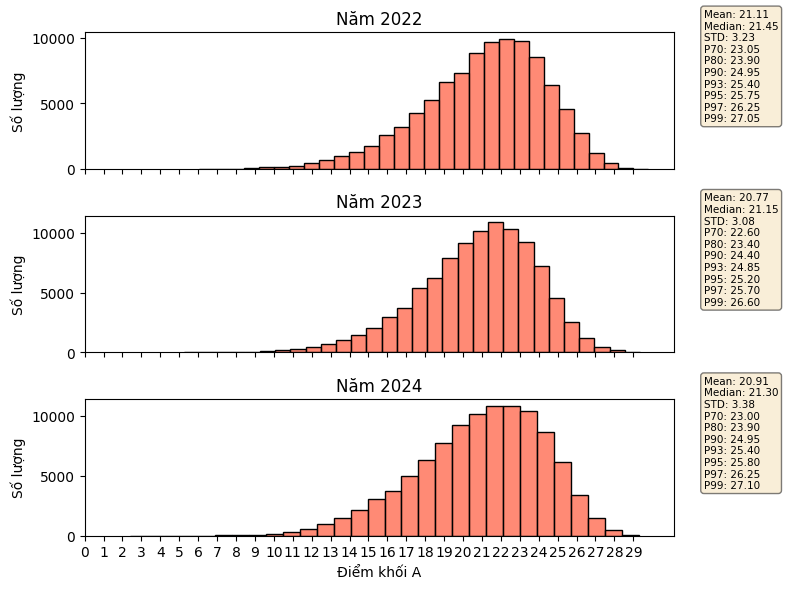

In [ ]:
data = df_filtered.copy()

sub = 'A'

# Chuyển đổi dữ liệu năm sang số
data['year'] = pd.to_numeric(data['year'])

# Lọc theo năm gần đây (đảm bảo nó là số nguyên)
recent_years = data[data['year'].isin([2022, 2023, 2024])].copy()

# (Phạm vi điểm)
score = list(range(0, 30, 1))

fig, axes = plt.subplots(3, 1, figsize=(8, 6), sharex=True)

# Sắp xếp lại năm
recent_years_sorted = sorted(recent_years['year'].unique())

for i, year in enumerate(recent_years_sorted):
  # Vẽ biểu đồ theo khối từng năm
  sns.histplot(recent_years[recent_years['year'] == year][sub], bins=30, kde=False, ax=axes[i], edgecolor='black', color='tomato')
  axes[i].set_title(f'Năm {year}')
  axes[i].set_xlabel(f'Điểm khối {sub}')
  axes[i].set_ylabel('Số lượng')
  # Tính thống kê cột khối A
  khoa_data = recent_years[recent_years['year'] == year][sub].dropna()
  mean = khoa_data.mean()
  median = khoa_data.median()
  std_dev = khoa_data.std()
  percentiles = khoa_data.quantile([0.70, 0.80, 0.90, 0.93, 0.95, 0.97, 0.99])

  # Tạo hộp miêu tả số liệu thống kê
  text_str = (f'Mean: {mean:.2f}\nMedian: {median:.2f}\nSTD: {std_dev:.2f}\n'
              f'P70: {percentiles[0.70]:.2f}\nP80: {percentiles[0.80]:.2f}\n'
              f'P90: {percentiles[0.90]:.2f}\nP93: {percentiles[0.93]:.2f}\n'
              f'P95: {percentiles[0.95]:.2f}\nP97: {percentiles[0.97]:.2f}\nP99: {percentiles[0.99]:.2f}')
  props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
  axes[i].text(1.05, 0.75, text_str, transform=axes[i].transAxes, fontsize=7.5,
                verticalalignment='center', horizontalalignment='left', bbox=props)
plt.xticks(score)
plt.tight_layout()
plt.show()


Sự chênh lệnh trung bình số học sinh:  228.31578947368416
Khoảng tin cậy 95% cho sự chênh lệch trung bình:  (-1465.091041484338, 1921.7226204317062)


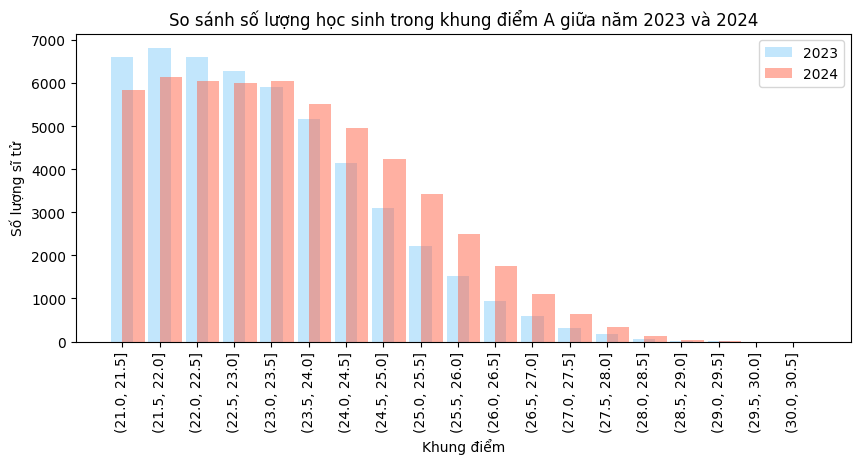

In [ ]:
from scipy import stats

combo = 'A'
bins = np.arange(21, 31, 0.5) # range điểm

# Lọc dữ liệu
df_2023 = df_filtered[df_filtered['year'] == '2023'].copy()
df_2024 = df_filtered[df_filtered['year'] == '2024'].copy()

# Tạo tập dữ liệu
df_2023.loc[:, 'bins'] = pd.cut(df_2023[combo], bins).copy()
df_2024.loc[:, 'bins'] = pd.cut(df_2024[combo], bins).copy()

count_2023 = df_2023['bins'].value_counts().sort_index()
count_2024 = df_2024['bins'].value_counts().sort_index()

mean_diff = count_2024.mean() - count_2023.mean()
std_diff = np.sqrt(count_2024.var() + count_2023.var())

# Tính khoảng tin cậy
confidence_interval = stats.norm.interval(0.95, loc=mean_diff, scale=std_diff / np.sqrt(len(count_2023)))

print('Sự chênh lệnh trung bình số học sinh: ', mean_diff)
print('Khoảng tin cậy 95% cho sự chênh lệch trung bình: ', confidence_interval)

# Vẽ biểu đồ thanh
plt.figure(figsize=(10, 4))
plt.bar(count_2023.index.astype(str), count_2023.values, width=0.6, label='2023', align='center', alpha=0.5, color='lightskyblue')
plt.bar(count_2024.index.astype(str), count_2024.values, width=0.6, label='2024', align='edge', alpha=0.5, color='tomato')

plt.xlabel('Khung điểm')
plt.ylabel('Số lượng sĩ tử')
plt.title(f'So sánh số lượng học sinh trong khung điểm {combo} giữa năm 2023 và 2024')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()


#### Group A1

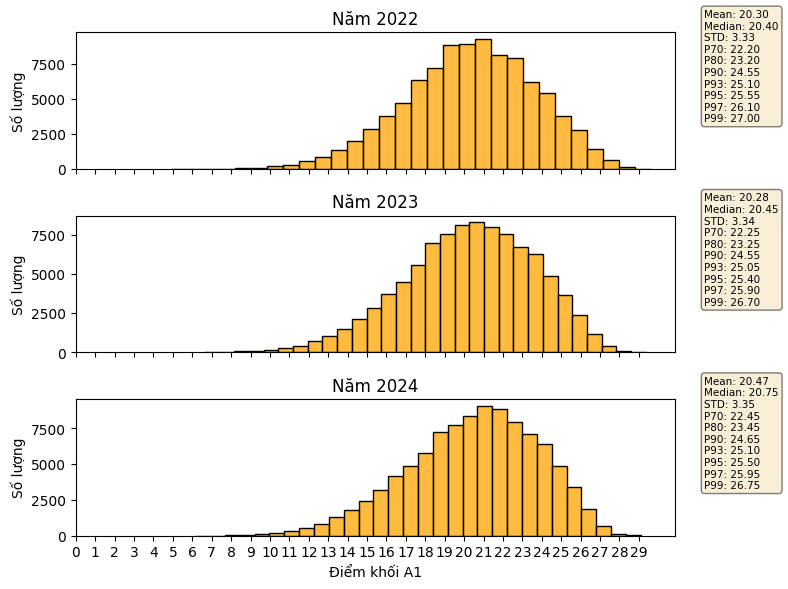

In [ ]:
data = df_filtered.copy()

sub = 'A1'

# Chuyển đổi dữ liệu năm sang số
data['year'] = pd.to_numeric(data['year'])

# Lọc theo năm gần đây (đảm bảo nó là số nguyên)
recent_years = data[data['year'].isin([2022, 2023, 2024])].copy()

# (Phạm vi điểm)
score = list(range(0, 30, 1))

fig, axes = plt.subplots(3, 1, figsize=(8, 6), sharex=True)

# Sắp xếp lại năm
recent_years_sorted = sorted(recent_years['year'].unique())

for i, year in enumerate(recent_years_sorted):
  # Vẽ biểu đồ theo khối từng năm
  sns.histplot(recent_years[recent_years['year'] == year][sub], bins=30, kde=False, ax=axes[i], edgecolor='black', color='orange')
  axes[i].set_title(f'Năm {year}')
  axes[i].set_xlabel(f'Điểm khối {sub}')
  axes[i].set_ylabel('Số lượng')
  # Tính thống kê khối A1
  khoa_data = recent_years[recent_years['year'] == year][sub].dropna()
  mean = khoa_data.mean()
  median = khoa_data.median()
  std_dev = khoa_data.std()
  percentiles = khoa_data.quantile([0.70, 0.80, 0.90, 0.93, 0.95, 0.97, 0.99])

  # Tạo hộp miêu tả số liệu thống kê
  text_str = (f'Mean: {mean:.2f}\nMedian: {median:.2f}\nSTD: {std_dev:.2f}\n'
              f'P70: {percentiles[0.70]:.2f}\nP80: {percentiles[0.80]:.2f}\n'
              f'P90: {percentiles[0.90]:.2f}\nP93: {percentiles[0.93]:.2f}\n'
              f'P95: {percentiles[0.95]:.2f}\nP97: {percentiles[0.97]:.2f}\nP99: {percentiles[0.99]:.2f}')
  props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
  axes[i].text(1.05, 0.75, text_str, transform=axes[i].transAxes, fontsize=7.5,
                verticalalignment='center', horizontalalignment='left', bbox=props)
plt.xticks(score)
plt.tight_layout()
plt.show()


Sự chênh lệnh trung bình số học sinh:  268.2105263157896
Khoảng tin cậy 95% cho sự chênh lệch trung bình:  (-1116.2508140782998, 1652.671866709879)


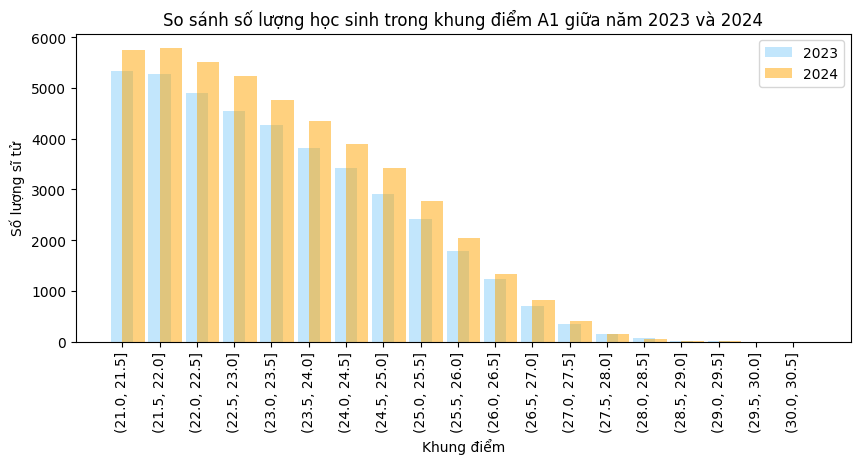

In [ ]:
from scipy import stats

combo = 'A1'
bins = np.arange(21, 31, 0.5) # range điểm

# Lọc dữ liệu
df_2023 = df_filtered[df_filtered['year'] == '2023'].copy()
df_2024 = df_filtered[df_filtered['year'] == '2024'].copy()

# Tạo tập dữ liệu
df_2023.loc[:, 'bins'] = pd.cut(df_2023[combo], bins).copy()
df_2024.loc[:, 'bins'] = pd.cut(df_2024[combo], bins).copy()

count_2023 = df_2023['bins'].value_counts().sort_index()
count_2024 = df_2024['bins'].value_counts().sort_index()

mean_diff = count_2024.mean() - count_2023.mean()
std_diff = np.sqrt(count_2024.var() + count_2023.var())

# Tính khoảng tin cậy
confidence_interval = stats.norm.interval(0.95, loc=mean_diff, scale=std_diff / np.sqrt(len(count_2023)))

print('Sự chênh lệnh trung bình số học sinh: ', mean_diff)
print('Khoảng tin cậy 95% cho sự chênh lệch trung bình: ', confidence_interval)

# Vẽ biểu đồ thanh
plt.figure(figsize=(10, 4))
plt.bar(count_2023.index.astype(str), count_2023.values, width=0.6, label='2023', align='center', alpha=0.5, color='lightskyblue')
plt.bar(count_2024.index.astype(str), count_2024.values, width=0.6, label='2024', align='edge', alpha=0.5, color='orange')

plt.xlabel('Khung điểm')
plt.ylabel('Số lượng sĩ tử')
plt.title(f'So sánh số lượng học sinh trong khung điểm {combo} giữa năm 2023 và 2024')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()


#### Group B


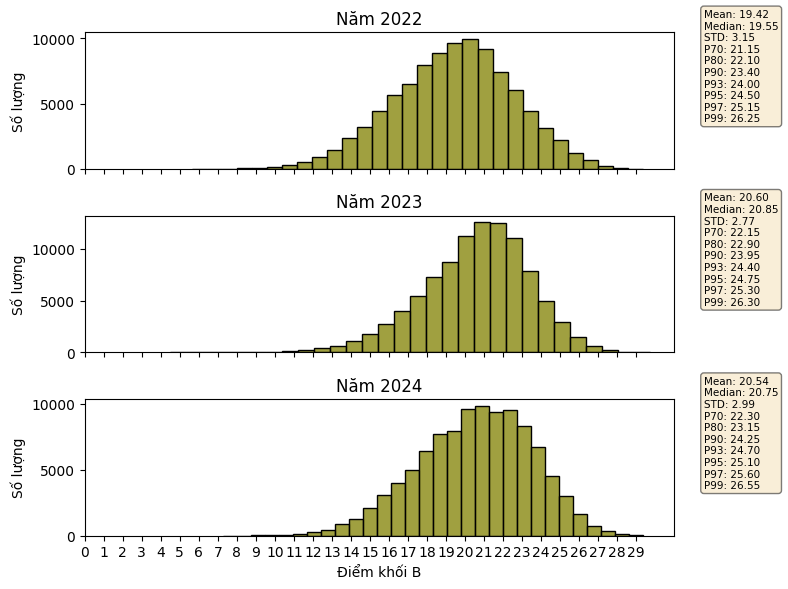

In [ ]:
data = df_filtered.copy()

sub = 'B'

# Chuyển đổi dữ liệu năm sang số
data['year'] = pd.to_numeric(data['year'])

# Lọc theo năm gần đây (đảm bảo nó là số nguyên)
recent_years = data[data['year'].isin([2022, 2023, 2024])]

# (Phạm vi điểm)
score = list(range(0, 30, 1))

fig, axes = plt.subplots(3, 1, figsize=(8, 6), sharex=True)

# Sắp xếp lại năm
recent_years_sorted = sorted(recent_years['year'].unique())

for i, year in enumerate(recent_years_sorted):

    # Vẽ biểu đồ histogram cho chủ đề trong năm đã cho
    year_data = recent_years[recent_years['year'] == year][sub].dropna()

    if not year_data.empty:
        sns.histplot(year_data, bins=30, kde=False, ax=axes[i], edgecolor='black', color='olive')
        axes[i].set_title(f'Năm {year}')
        axes[i].set_xlabel(f'Điểm khối {sub}')
        axes[i].set_ylabel('Số lượng')

        # Tính thống kê khối B
        khoa_data = recent_years[recent_years['year'] == year][sub].dropna()
        mean = khoa_data.mean()
        median = khoa_data.median()
        std_dev = khoa_data.std()
        percentiles = khoa_data.quantile([0.70, 0.80, 0.90, 0.93, 0.95, 0.97, 0.99])

        # Tạo hộp văn bản có số liệu thống kê
        text_str = (f'Mean: {mean:.2f}\nMedian: {median:.2f}\nSTD: {std_dev:.2f}\n'
                    f'P70: {percentiles[0.70]:.2f}\nP80: {percentiles[0.80]:.2f}\n'
                    f'P90: {percentiles[0.90]:.2f}\nP93: {percentiles[0.93]:.2f}\n'
                    f'P95: {percentiles[0.95]:.2f}\nP97: {percentiles[0.97]:.2f}\nP99: {percentiles[0.99]:.2f}')
        props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
        axes[i].text(1.05, 0.75, text_str, transform=axes[i].transAxes, fontsize=7.5,
                     verticalalignment='center', horizontalalignment='left', bbox=props)

plt.xticks(score)
plt.tight_layout()
plt.show()


Sự chênh lệnh trung bình số học sinh:  84.05263157894706
Khoảng tin cậy 95% cho sự chênh lệch trung bình:  (-1652.040298873189, 1820.145562031083)


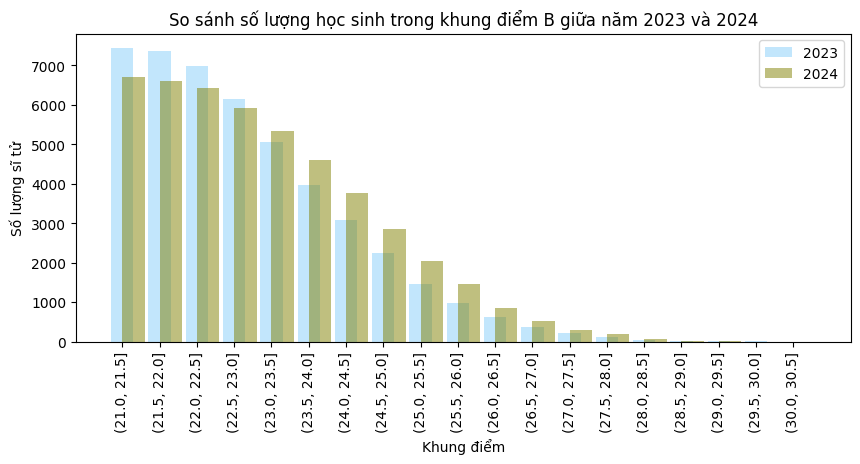

In [ ]:
from scipy import stats

combo = 'B'
bins = np.arange(21, 31, 0.5)

# Lọc khung dữ liệu gốc và sử dụng .loc để sửa đổi dữ liệu đã lọc
df_2023 = df_filtered[df_filtered['year'] == '2023'].copy()
df_2024 = df_filtered[df_filtered['year'] == '2024'].copy()

# Sử dụng .loc để thiết lập cột 'bins' mới
df_2023.loc[:, 'bins'] = pd.cut(df_2023[combo], bins).copy()
df_2024.loc[:, 'bins'] = pd.cut(df_2024[combo], bins).copy()

count_2023 = df_2023['bins'].value_counts().sort_index()
count_2024 = df_2024['bins'].value_counts().sort_index()

mean_diff = count_2024.mean() - count_2023.mean()
std_diff = np.sqrt(count_2024.var() + count_2023.var())

# Tính toán khoảng tin cậy
confidence_interval = stats.norm.interval(0.95, loc=mean_diff, scale=std_diff / np.sqrt(len(count_2023)))

print('Sự chênh lệnh trung bình số học sinh: ', mean_diff)
print('Khoảng tin cậy 95% cho sự chênh lệch trung bình: ', confidence_interval)

# Vẽ biểu đồ thanh
plt.figure(figsize=(10, 4))
plt.bar(count_2023.index.astype(str), count_2023.values, width=0.6, label='2023', align='center', alpha=0.5, color='lightskyblue')
plt.bar(count_2024.index.astype(str), count_2024.values, width=0.6, label='2024', align='edge', alpha=0.5, color='olive')

plt.xlabel('Khung điểm')
plt.ylabel('Số lượng sĩ tử')
plt.title(f'So sánh số lượng học sinh trong khung điểm {combo} giữa năm 2023 và 2024')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()


#### Group C


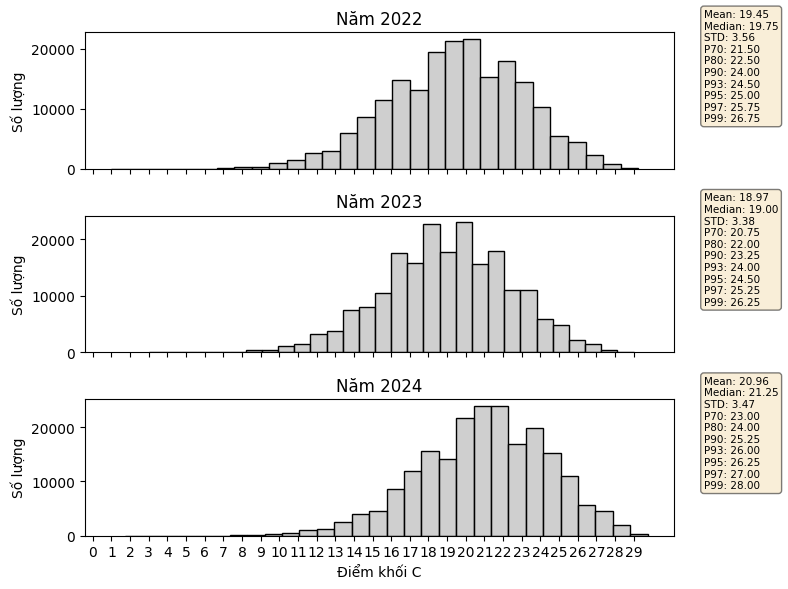

In [ ]:
data = df_filtered.copy()

sub = 'C'

# Chuyển đổi năm thành số
data['year'] = pd.to_numeric(data['year'])

# Lọc theo những năm gần đây (đảm bảo năm là số nguyên)
recent_years = data[data['year'].isin([2022, 2023, 2024])]

# Xác định phạm vi điểm
score = list(range(0, 30, 1))

fig, axes = plt.subplots(3, 1, figsize=(8, 6), sharex=True)

# Sắp xếp theo những năm gần đây
recent_years_sorted = sorted(recent_years['year'].unique())

for i, year in enumerate(recent_years_sorted):
    # Vẽ biểu đồ histogram cho chủ đề trong năm đã cho
    year_data = recent_years[recent_years['year'] == year][sub].dropna()

    if not year_data.empty:
        sns.histplot(year_data, bins=30, kde=False, ax=axes[i], edgecolor='black', color='silver')
        axes[i].set_title(f'Năm {year}')
        axes[i].set_xlabel(f'Điểm khối {sub}')
        axes[i].set_ylabel('Số lượng')

        # Tính toán số liệu thống kê cho cột 'toán'
        khoa_data = recent_years[recent_years['year'] == year][sub].dropna()
        mean = khoa_data.mean()
        median = khoa_data.median()
        std_dev = khoa_data.std()
        percentiles = khoa_data.quantile([0.70, 0.80, 0.90, 0.93, 0.95, 0.97, 0.99])

        # Tạo hộp văn bản có số liệu thống kê
        text_str = (f'Mean: {mean:.2f}\nMedian: {median:.2f}\nSTD: {std_dev:.2f}\n'
                    f'P70: {percentiles[0.70]:.2f}\nP80: {percentiles[0.80]:.2f}\n'
                    f'P90: {percentiles[0.90]:.2f}\nP93: {percentiles[0.93]:.2f}\n'
                    f'P95: {percentiles[0.95]:.2f}\nP97: {percentiles[0.97]:.2f}\nP99: {percentiles[0.99]:.2f}')
        props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
        axes[i].text(1.05, 0.75, text_str, transform=axes[i].transAxes, fontsize=7.5,
                     verticalalignment='center', horizontalalignment='left', bbox=props)

plt.xticks(score)
plt.tight_layout()
plt.show()


Sự chênh lệnh trung bình số học sinh:  84.05263157894706
Khoảng tin cậy 95% cho sự chênh lệch trung bình:  (-1652.040298873189, 1820.145562031083)


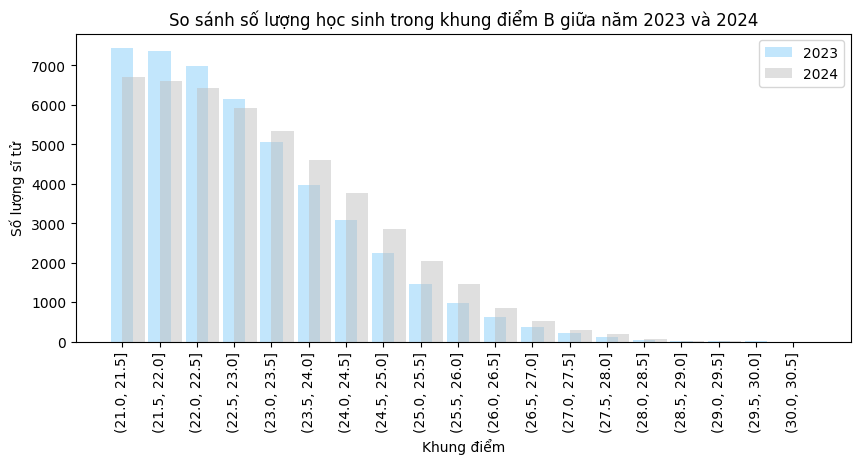

In [ ]:
from scipy import stats

combo = 'B'
bins = np.arange(21, 31, 0.5)

# Lọc khung dữ liệu gốc và sử dụng .loc để sửa đổi dữ liệu đã lọc
df_2023 = df_filtered[df_filtered['year'] == '2023'].copy()
df_2024 = df_filtered[df_filtered['year'] == '2024'].copy()

# Sử dụng .loc để thiết lập cột 'bins' mới
df_2023.loc[:, 'bins'] = pd.cut(df_2023[combo], bins).copy()
df_2024.loc[:, 'bins'] = pd.cut(df_2024[combo], bins).copy()

count_2023 = df_2023['bins'].value_counts().sort_index()
count_2024 = df_2024['bins'].value_counts().sort_index()

mean_diff = count_2024.mean() - count_2023.mean()
std_diff = np.sqrt(count_2024.var() + count_2023.var())

# Tính toán khoảng tin cậy
confidence_interval = stats.norm.interval(0.95, loc=mean_diff, scale=std_diff / np.sqrt(len(count_2023)))

print('Sự chênh lệnh trung bình số học sinh: ', mean_diff)
print('Khoảng tin cậy 95% cho sự chênh lệch trung bình: ', confidence_interval)

# Vẽ biểu đồ thanh
plt.figure(figsize=(10, 4))
plt.bar(count_2023.index.astype(str), count_2023.values, width=0.6, label='2023', align='center', alpha=0.5, color='lightskyblue')
plt.bar(count_2024.index.astype(str), count_2024.values, width=0.6, label='2024', align='edge', alpha=0.5, color='silver')

plt.xlabel('Khung điểm')
plt.ylabel('Số lượng sĩ tử')
plt.title(f'So sánh số lượng học sinh trong khung điểm {combo} giữa năm 2023 và 2024')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()


#### Group D

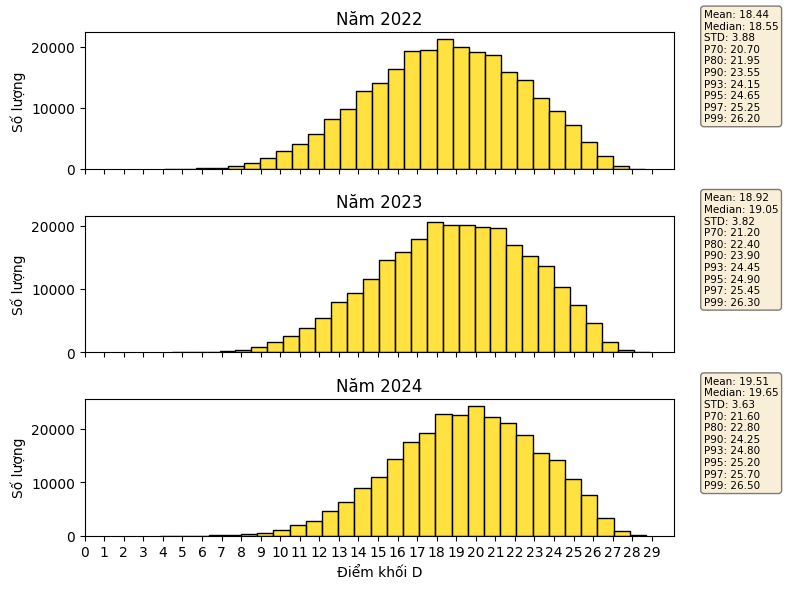

In [ ]:
data = df_filtered.copy()

sub = 'D'

# Chuyển đổi năm thành số
data['year'] = pd.to_numeric(data['year'])

# Lọc theo những năm gần đây (đảm bảo năm là số nguyên)
recent_years = data[data['year'].isin([2022, 2023, 2024])]

# Xác định phạm vi điểm
score = list(range(0, 30, 1))

fig, axes = plt.subplots(3, 1, figsize=(8, 6), sharex=True)

# Sắp xếp theo những năm gần đây
recent_years_sorted = sorted(recent_years['year'].unique())

for i, year in enumerate(recent_years_sorted):
    # Vẽ biểu đồ histogram cho chủ đề trong năm đã cho
    year_data = recent_years[recent_years['year'] == year][sub].dropna()

    if not year_data.empty:
        sns.histplot(year_data, bins=30, kde=False, ax=axes[i], edgecolor='black', color='gold')
        axes[i].set_title(f'Năm {year}')
        axes[i].set_xlabel(f'Điểm khối {sub}')
        axes[i].set_ylabel('Số lượng')

       # Tính toán số liệu thống kê cho khối D
        khoa_data = recent_years[recent_years['year'] == year][sub].dropna()
        mean = khoa_data.mean()
        median = khoa_data.median()
        std_dev = khoa_data.std()
        percentiles = khoa_data.quantile([0.70, 0.80, 0.90, 0.93, 0.95, 0.97, 0.99])

        # Tạo hộp văn bản có số liệu thống kê
        text_str = (f'Mean: {mean:.2f}\nMedian: {median:.2f}\nSTD: {std_dev:.2f}\n'
                    f'P70: {percentiles[0.70]:.2f}\nP80: {percentiles[0.80]:.2f}\n'
                    f'P90: {percentiles[0.90]:.2f}\nP93: {percentiles[0.93]:.2f}\n'
                    f'P95: {percentiles[0.95]:.2f}\nP97: {percentiles[0.97]:.2f}\nP99: {percentiles[0.99]:.2f}')
        props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
        axes[i].text(1.05, 0.75, text_str, transform=axes[i].transAxes, fontsize=7.5,
                     verticalalignment='center', horizontalalignment='left', bbox=props)

plt.xticks(score)
plt.tight_layout()
plt.show()


Sự chênh lệnh trung bình số học sinh:  762.3157894736842
Khoảng tin cậy 95% cho sự chênh lệch trung bình:  (-2166.0327652285287, 3690.664344175897)


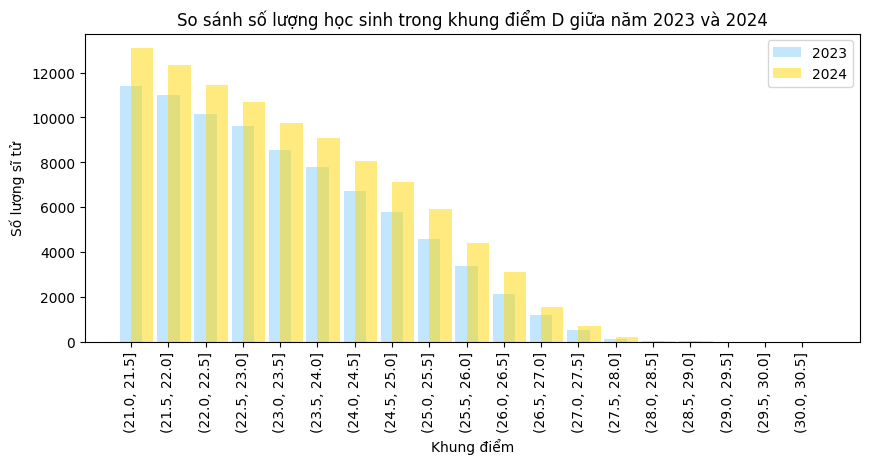

In [ ]:
from scipy import stats

combo = 'D'
bins = np.arange(21, 31, 0.5)

# Lọc khung dữ liệu gốc và sử dụng .loc để sửa đổi dữ liệu đã lọc
df_2023 = df_filtered[df_filtered['year'] == '2023'].copy()
df_2024 = df_filtered[df_filtered['year'] == '2024'].copy()

# Sử dụng .loc để thiết lập cột 'bins' mới
df_2023.loc[:, 'bins'] = pd.cut(df_2023[combo], bins).copy()
df_2024.loc[:, 'bins'] = pd.cut(df_2024[combo], bins).copy()

count_2023 = df_2023['bins'].value_counts().sort_index()
count_2024 = df_2024['bins'].value_counts().sort_index()

mean_diff = count_2024.mean() - count_2023.mean()
std_diff = np.sqrt(count_2024.var() + count_2023.var())

# Tính toán khoảng tin cậy
confidence_interval = stats.norm.interval(0.95, loc=mean_diff, scale=std_diff / np.sqrt(len(count_2023)))

print('Sự chênh lệnh trung bình số học sinh: ', mean_diff)
print('Khoảng tin cậy 95% cho sự chênh lệch trung bình: ', confidence_interval)

# Vẽ biểu đồ thanh
plt.figure(figsize=(10, 4))
plt.bar(count_2023.index.astype(str), count_2023.values, width=0.6, label='2023', align='center', alpha=0.5, color='lightskyblue')
plt.bar(count_2024.index.astype(str), count_2024.values, width=0.6, label='2024', align='edge', alpha=0.5, color='gold')

plt.xlabel('Khung điểm')
plt.ylabel('Số lượng sĩ tử')
plt.title(f'So sánh số lượng học sinh trong khung điểm {combo} giữa năm 2023 và 2024')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()


In [ ]:
combinations = ['A', 'A1', 'B', 'C', 'D']
percentiles = list(range(70, 101, 2))

# Tạo một DataFrame rỗng để lưu các phần trăm (percentile)
percentile_df = pd.DataFrame(index=percentiles)

# Vòng lặp qua các tổ hợp và năm
for combo in combinations:
    for year in ['2022', '2023', '2024']:
        # Lọc dữ liệu theo năm và tổ hợp, loại bỏ các giá trị thiếu
        data = df_filtered[df_filtered['year'] == year][combo].dropna()

        # Kiểm tra nếu dữ liệu không rỗng
        if len(data) > 0:
            # Tính toán các giá trị phần trăm (percentile)
            percentile_values = np.percentile(data, percentiles)
            # Lưu kết quả vào DataFrame với tên cột là tổ hợp và năm
            percentile_df[f'{combo}_{year}'] = percentile_values
        else:
            # Nếu dữ liệu rỗng, điền bằng NaN hoặc giá trị mặc định khác
            percentile_df[f'{combo}_{year}'] = [np.nan] * len(percentiles)

# Chuyển vị DataFrame để có tổ hợp/năm làm hàng
percentile_df = percentile_df.T

# Đặt tên cho index để dễ hiểu
percentile_df.index.name = 'Combination_Year'


In [ ]:
percentile_df

70     72     74     76     78     80     82     84   \
Combination_Year                                                           
A_2022            23.05  23.20  23.40  23.55  23.70  23.90  24.10  24.25   
A_2023            22.60  22.75  22.90  23.05  23.25  23.40  23.55  23.75   
A_2024            23.00  23.15  23.35  23.50  23.70  23.90  24.05  24.25   
A1_2022           22.20  22.40  22.60  22.80  23.00  23.20  23.45  23.70   
A1_2023           22.25  22.45  22.60  22.85  23.05  23.25  23.50  23.75   
A1_2024           22.45  22.65  22.85  23.05  23.25  23.45  23.65  23.90   
B_2022            21.15  21.30  21.50  21.70  21.90  22.10  22.30  22.55   
B_2023            22.15  22.30  22.45  22.60  22.75  22.90  23.10  23.25   
B_2024            22.30  22.45  22.60  22.80  22.95  23.15  23.35  23.55   
C_2022            21.50  21.75  22.00  22.00  22.25  22.50  22.75  23.00   
C_2023            20.75  21.00  21.25  21.50  21.75  22.00  22.25  22.50   
C_2024            23.00  23.00  23.25  23.50  23.75  24.00  24.25  24.50   
D_2022            20.70  20.95  21.20  21.40  21.70  21.95  22.20  22.50   
D_2023            21.20  21.42  21.65  21.90  22.15  22.40  22.70  22.95   
D_2024            21.60  21.85  22.05  22.30  22.55  22.80  23.05  23.35   

                    86     88     90     92     94     96     98     100  
Combination_Year                                                          
A_2022            24.45  24.70  24.95  25.20  25.55  26.00  26.55  29.80  
A_2023            23.95  24.15  24.40  24.70  25.00  25.45  26.05  29.35  
A_2024            24.50  24.70  24.95  25.25  25.60  26.00  26.60  29.30  
A1_2022           24.00  24.25  24.55  24.90  25.30  25.80  26.45  29.60  
A1_2023           24.00  24.25  24.55  24.85  25.20  25.65  26.25  29.35  
A1_2024           24.15  24.40  24.65  24.95  25.30  25.70  26.30  29.10  
B_2022            22.80  23.10  23.40  23.80  24.25  24.80  25.60  29.35  
B_2023            23.45  23.70  23.95  24.20  24.55  25.00  25.70  29.75  
B_2024            23.75  24.00  24.25  24.55  24.90  25.35  26.00  29.35  
C_2022            23.25  23.50  24.00  24.25  24.75  25.25  26.25  29.25  
C_2023            22.75  23.00  23.25  23.75  24.25  24.75  25.75  29.00  
C_2024            24.75  25.00  25.25  25.75  26.00  26.75  27.50  29.75  
D_2022            22.85  23.15  23.55  23.95  24.40  24.95  25.65  28.65  
D_2023            23.25  23.55  23.90  24.25  24.70  25.15  25.80  28.90  
D_2024            23.65  23.95  24.25  24.60  25.00  25.45  26.05  28.70

*The average admission scores for the exam groups in 2024 have slightly increased by about 0.2 to 0.5 points.*

### **3.5 Correlation matrix**

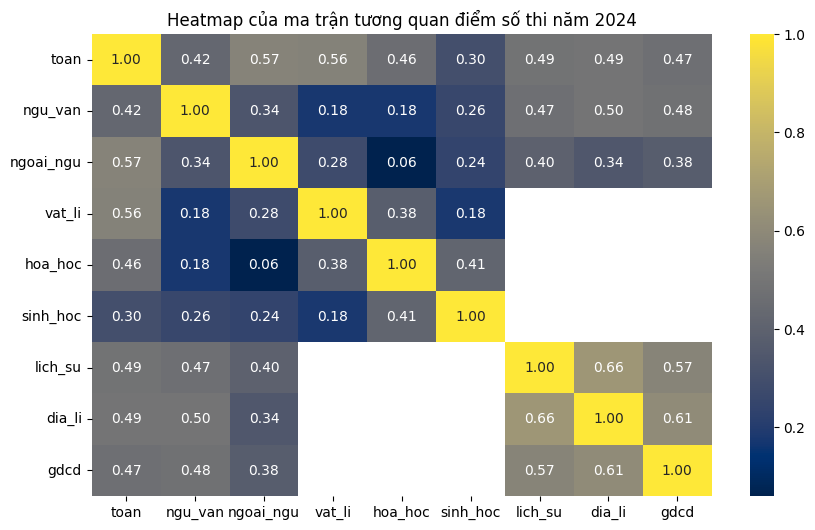

In [ ]:
# Lọc dữ liệu cho năm 2024
df_2024 = df_filtered[df_filtered['year'] == '2024']

# Chọn các cột điểm số của các môn học
subject_scores = df_2024[['toan', 'ngu_van', 'ngoai_ngu', 'vat_li', 'hoa_hoc', 'sinh_hoc', 'lich_su', 'dia_li', 'gdcd']]

# Tính toán ma trận tương quan giữa các điểm số môn học
correlation_matrix = subject_scores.corr()

# Tạo biểu đồ với kích thước 10x6
plt.figure(figsize=(10, 6))

# Vẽ heatmap cho ma trận tương quan, với giá trị hiển thị trên từng ô
sns.heatmap(correlation_matrix, annot=True, cmap='cividis', fmt='.2f')

# Đặt tiêu đề cho biểu đồ
plt.title('Heatmap của ma trận tương quan điểm số thi năm 2024')

# Hiển thị biểu đồ
plt.show()


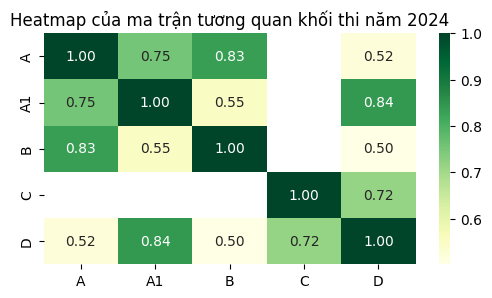

In [ ]:
# Lọc dữ liệu cho năm 2024
df_2024 = df_filtered[df_filtered['year'] == '2024']

# Chọn các cột điểm số của các khối thi (A, A1, B, C, D)
group_major = df_2024[['A', 'A1', 'B', 'C', 'D']]

# Tính toán ma trận tương quan giữa các khối thi
correlation_matrix = group_major.corr()

plt.figure(figsize=(6, 3))

# Vẽ heatmap cho ma trận tương quan, với giá trị hiển thị trên từng ô
sns.heatmap(correlation_matrix, annot=True, cmap='YlGn', fmt='.2f')
plt.title('Heatmap của ma trận tương quan khối thi năm 2024')
plt.show()


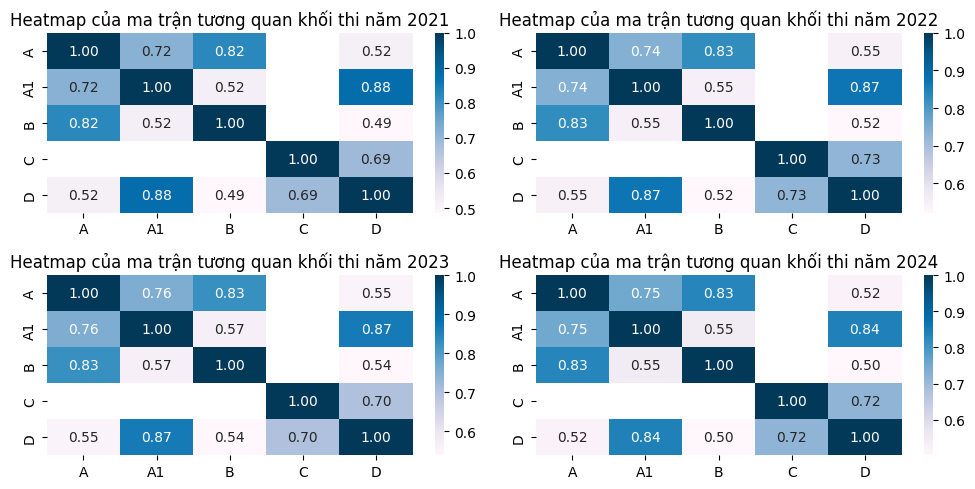

In [ ]:
# Danh sách các năm cần vẽ biểu đồ
years = ['2021', '2022', '2023', '2024']

fig, axes = plt.subplots(2, 2, figsize=(10, 5))

# Làm phẳng mảng các trục (axes) để dễ dàng duyệt qua
axes = axes.flatten()

# Vòng lặp qua từng năm
for i, year in enumerate(years):
    # Lọc dữ liệu theo từng năm
    df_year = df_filtered[df_filtered['year'] == year]

    # Lấy điểm số của các khối thi (A, A1, B, C, D)
    group_score = df_year[['A', 'A1', 'B', 'C', 'D']]

    # Tính toán ma trận tương quan cho các khối thi
    correlation_matrix = group_score.corr()

    # Vẽ heatmap cho ma trận tương quan, gán vào biểu đồ con tương ứng
    sns.heatmap(correlation_matrix, annot=True, cmap='PuBu', fmt='.2f', ax=axes[i])

    # Đặt tiêu đề cho biểu đồ con tương ứng với từng năm
    axes[i].set_title(f'Heatmap của ma trận tương quan khối thi năm {year}')

# Điều chỉnh khoảng cách giữa các biểu đồ con
plt.subplots_adjust(wspace=0.5, hspace=0.5)

# Căn chỉnh bố cục biểu đồ cho chặt chẽ
plt.tight_layout()

plt.show()


In [ ]:
import pandas as pd

# Từ điển chứa tên tỉnh thành và khu vực tương ứng
data_province = {
    'ten_tinh_thanh': [
        'Hà Nội', 'Bắc Ninh', 'Hà Nam', 'Hải Dương', 'Hải Phòng', 'Hưng Yên',
        'Nam Định', 'Thái Bình', 'Vĩnh Phúc', 'Ninh Bình', 'Phú Thọ', 'Hà Giang',
        'Tuyên Quang', 'Cao Bằng', 'Bắc Kạn', 'Thái Nguyên', 'Lạng Sơn', 'Bắc Giang',
        'Quảng Ninh', 'Hòa Bình', 'Sơn La', 'Điện Biên', 'Lai Châu', 'Lào Cai', 'Yên Bái',
        'Thanh Hóa', 'Nghệ An', 'Hà Tĩnh', 'Quảng Bình', 'Quảng Trị', 'THỪA THIÊN - HUẾ',
        'Đà Nẵng', 'Quảng Nam', 'Quảng Ngãi', 'Bình Định', 'Phú Yên', 'Khánh Hòa',
        'Ninh Thuận', 'Bình Thuận', 'Kon Tum', 'Gia Lai', 'Đắk Lắk', 'Đắk Nông',
        'Lâm Đồng', 'TP. HỒ CHÍ MINH', 'BÀ RỊA - VŨNG TÀU', 'Bình Dương', 'Bình Phước',
        'Đồng Nai', 'Tây Ninh', 'An Giang', 'Bạc Liêu', 'Bến Tre', 'Cà Mau', 'Cần Thơ',
        'Đồng Tháp', 'Hậu Giang', 'Kiên Giang', 'Long An', 'Sóc Trăng', 'Tiền Giang',
        'Trà Vinh', 'Vĩnh Long'
    ],
    'khu_vuc': [
    'Đồng Bằng Sông Hồng', 'Đồng Bằng Sông Hồng', 'Đồng Bằng Sông Hồng',
    'Đồng Bằng Sông Hồng', 'Đồng Bằng Sông Hồng', 'Đồng Bằng Sông Hồng',
    'Đồng Bằng Sông Hồng', 'Đồng Bằng Sông Hồng', 'Đồng Bằng Sông Hồng',
    'Đồng Bằng Sông Hồng', 'Đông Bắc Bộ', 'Đông Bắc Bộ', 'Đông Bắc Bộ',
    'Đông Bắc Bộ', 'Đông Bắc Bộ', 'Đông Bắc Bộ', 'Đông Bắc Bộ', 'Đông Bắc Bộ',
    'Đông Bắc Bộ', 'Tây Bắc Bộ', 'Tây Bắc Bộ', 'Tây Bắc Bộ', 'Tây Bắc Bộ',
    'Tây Bắc Bộ', 'Tây Bắc Bộ', 'Bắc Trung Bộ', 'Bắc Trung Bộ', 'Bắc Trung Bộ',
    'Bắc Trung Bộ', 'Bắc Trung Bộ', 'Bắc Trung Bộ', 'Nam Trung Bộ', 'Nam Trung Bộ',
    'Nam Trung Bộ', 'Nam Trung Bộ', 'Nam Trung Bộ', 'Nam Trung Bộ', 'Nam Trung Bộ',
    'Nam Trung Bộ', 'Tây Nguyên', 'Tây Nguyên', 'Tây Nguyên', 'Tây Nguyên',
    'Tây Nguyên', 'Đông Nam Bộ', 'Đông Nam Bộ', 'Đông Nam Bộ', 'Đông Nam Bộ',
    'Đông Nam Bộ', 'Đông Nam Bộ', 'Đồng Bằng Sông Cửu Long', 'Đồng Bằng Sông Cửu Long',
    'Đồng Bằng Sông Cửu Long', 'Đồng Bằng Sông Cửu Long', 'Đồng Bằng Sông Cửu Long',
    'Đồng Bằng Sông Cửu Long', 'Đồng Bằng Sông Cửu Long', 'Đồng Bằng Sông Cửu Long',
    'Đồng Bằng Sông Cửu Long', 'Đồng Bằng Sông Cửu Long', 'Đồng Bằng Sông Cửu Long',
    'Đồng Bằng Sông Cửu Long', 'Đồng Bằng Sông Cửu Long'
  ]
}

# Chuyển từ điển thành DataFrame
df_province = pd.DataFrame(data_province)

# Chuyển tên các tỉnh thành sang chữ hoa
df_province['ten_tinh_thanh'] = df_province['ten_tinh_thanh'].str.upper()

# Hiển thị 5 dòng đầu tiên của DataFrame
df_province.head()


ten_tinh_thanh              khu_vuc
0         HÀ NỘI  Đồng Bằng Sông Hồng
1       BẮC NINH  Đồng Bằng Sông Hồng
2         HÀ NAM  Đồng Bằng Sông Hồng
3      HẢI DƯƠNG  Đồng Bằng Sông Hồng
4      HẢI PHÒNG  Đồng Bằng Sông Hồng

### 3.6 Analysis by region

In [ ]:
# Sao chép DataFrame data_concat để tạo một bản sao độc lập
data = data_concat.copy()

# Chuyển cột 'ten_tinh_thanh' trong data thành chuỗi và loại bỏ khoảng trắng thừa
data['ten_tinh_thanh'] = data['ten_tinh_thanh'].astype(str).str.strip()

# Chuyển cột 'ten_tinh_thanh' trong df_province thành chuỗi và loại bỏ khoảng trắng thừa
df_province['ten_tinh_thanh'] = df_province['ten_tinh_thanh'].astype(str).str.strip()

# Gộp (merge) DataFrame 'data' và 'df_province' dựa trên cột 'ten_tinh_thanh'
# Sử dụng phương thức gộp trái (left join) để giữ tất cả các hàng trong 'data'
df_data_map_region = pd.merge(data, df_province, on='ten_tinh_thanh', how='left')


In [ ]:
df_year_group_region = (
    df_data_map_region
    .pivot_table(index='khu_vuc', columns='year',aggfunc='count',values='sbd')
    .reset_index()
    )

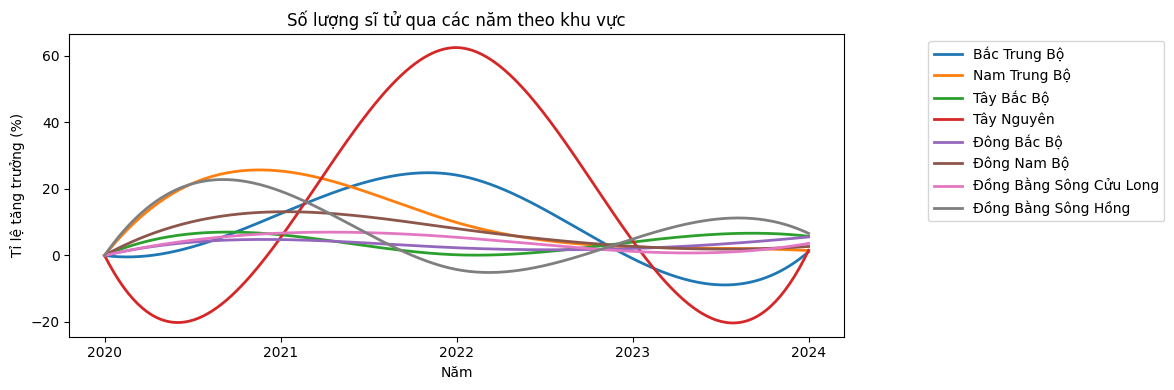

In [ ]:
# Tính số lượng sĩ tử theo năm và khu vực, sau đó dùng unstack để chuyển đổi hàng thành cột
students_per_year_with_region = df_data_map_region.groupby(['year', 'khu_vuc']).size().unstack()

# Tính tỉ lệ tăng trưởng giữa các năm theo khu vực
growth_rate_region = students_per_year_with_region.pct_change() * 100

# Thay thế giá trị vô hạn bằng NaN và sau đó điền NaN bằng 0
growth_rate_region.replace([np.inf, -np.inf], np.nan, inplace=True)
growth_rate_region.fillna(0, inplace=True)

# Tạo một biểu đồ với kích thước 12x4
plt.figure(figsize=(12, 4))

# Vẽ biểu đồ cho từng khu vực
for region in growth_rate_region.columns:
    x = growth_rate_region.index  # Trục x là các năm
    y = growth_rate_region[region]  # Trục y là tỉ lệ tăng trưởng theo khu vực

    # Sử dụng spline để làm mượt đường đồ thị
    x_new = np.linspace(x.astype(float).min(), x.astype(float).max(), 300)
    spl = make_interp_spline(x, y, k=3)  # Đường spline bậc 3
    y_smooth = spl(x_new)

    # Vẽ đường đồ thị cho mỗi khu vực
    plt.plot(x_new, y_smooth, label=region, linewidth=2, alpha=1)

# Thiết lập tiêu đề và nhãn trục
plt.title('Số lượng sĩ tử qua các năm theo khu vực')
plt.xlabel('Năm')
plt.ylabel('Tỉ lệ tăng trưởng (%)')

# Đảm bảo rằng trục y bắt đầu từ 0

# Hiển thị chú giải bên ngoài biểu đồ
plt.legend(loc='upper left', bbox_to_anchor=(1.1, 1))

# Tắt lưới
plt.grid(False)

# Đặt các nhãn cho trục x
plt.xticks(xlabel_year)

# Điều chỉnh bố cục biểu đồ
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()


In [ ]:
df_year_group_region.head(10)

year                  khu_vuc    2020    2021    2022    2023    2024
0                Bắc Trung Bộ   89017  100182  124388  123225  124587
1                Nam Trung Bộ   75904   95171  104599  107271  108833
2                  Tây Bắc Bộ   43442   46140   46227   48087   50854
3                  Tây Nguyên   31106   32774   53255   55618   56476
4                 Đông Bắc Bộ   92426   96830   99060  101126  106751
5                 Đông Nam Bộ  132409  149800  161882  166311  170786
6     Đồng Bằng Sông Cửu Long  138811  148126  156209  158100  163817
7         Đồng Bằng Sông Hồng  212601  253706  242969  254938  271820

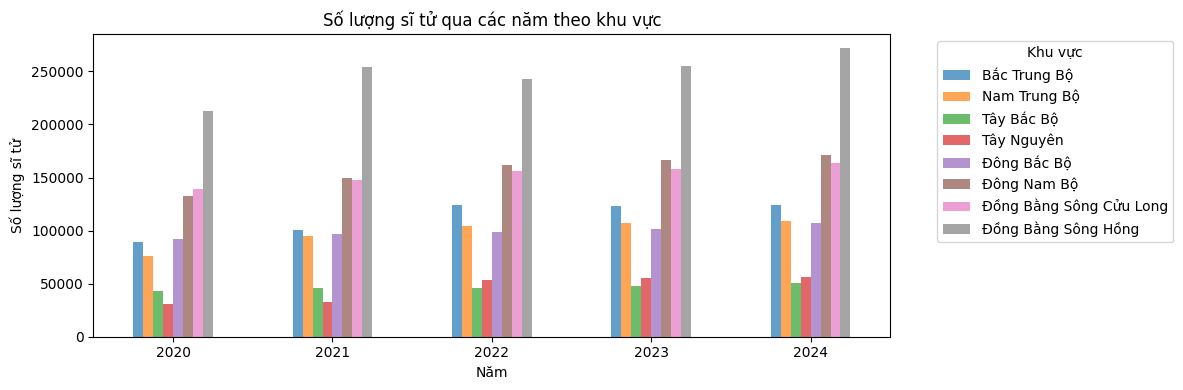

In [ ]:
# Tính số lượng sĩ tử theo năm và khu vực, sau đó dùng unstack để chuyển đổi hàng thành cột
students_per_year_with_region = df_data_map_region.groupby(['year', 'khu_vuc']).size().unstack()

# Vẽ biểu đồ cột với kích thước 12x4, alpha để điều chỉnh độ trong suốt
students_per_year_with_region.plot(kind='bar', figsize=(12, 4), alpha=0.7)

# Thiết lập tiêu đề và nhãn trục
plt.title('Số lượng sĩ tử qua các năm theo khu vực')
plt.xlabel('Năm')
plt.ylabel('Số lượng sĩ tử')

# Hiển thị chú giải, với tiêu đề 'Khu vực' và vị trí bên ngoài biểu đồ
plt.legend(title='Khu vực', bbox_to_anchor=(1.05,1), loc='upper left')

# Đặt góc xoay cho nhãn trục x là 0 (ngang hàng)
plt.xticks(rotation=0)

# Điều chỉnh bố cục biểu đồ
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()


In [ ]:
# Sao chép DataFrame df_data_map_region thành data_kv và chuyển cột 'year' thành chuỗi
data_kv = df_data_map_region
data_kv['year'] = data_kv['year'].astype(str)

# Lọc dữ liệu theo khu vực 'Tây Nguyên' và tạo bảng tổng hợp (pivot table)
# Với 'ten_tinh_thanh' làm chỉ mục, 'year' làm cột, và đếm giá trị 'sbd'
df_year_group_kv = (data_kv[data_kv['khu_vuc'] == 'Tây Nguyên']
                    .pivot_table(index='ten_tinh_thanh', columns='year', aggfunc='count', values='sbd')
                    .reset_index()
                    )

# Tính toán tỉ lệ thay đổi (so sánh) giữa năm 2021 và 2020
df_year_group_kv['comp_2021'] = (
    (df_year_group_kv['2021'] - df_year_group_kv['2020']) / df_year_group_kv['2020']
)

# Tính toán tỉ lệ thay đổi (so sánh) giữa năm 2022 và 2021
df_year_group_kv['comp_2022'] = (
    (df_year_group_kv['2022'] - df_year_group_kv['2021']) / df_year_group_kv['2021']
)

# Tính toán tỉ lệ thay đổi (so sánh) giữa năm 2023 và 2022
df_year_group_kv['comp_2023'] = (
    (df_year_group_kv['2023'] - df_year_group_kv['2022']) / df_year_group_kv['2022']
)

# Tính toán tỉ lệ thay đổi (so sánh) giữa năm 2024 và 2023
df_year_group_kv['comp_2024'] = (
    (df_year_group_kv['2024'] - df_year_group_kv['2023']) / df_year_group_kv['2023']
)


In [ ]:
# Sắp xếp DataFrame theo cột 'comp_2021' giảm dần (ascending=False)
# và áp dụng định dạng phần trăm cho các cột so sánh từ comp_2021 đến comp_2024
(
    df_year_group_kv.sort_values(by='comp_2021', ascending=False).style.format({
        'comp_2021': '{:.0%}',  # Định dạng cột 'comp_2021' thành phần trăm
        'comp_2022': '{:.0%}',
        'comp_2023': '{:.0%}',
        'comp_2024': '{:.0%}'
    })
    # Áp dụng màu nền gradient theo giá trị của các cột comp_* với bảng màu 'Blues'
    .background_gradient(subset=['comp_2021', 'comp_2022', 'comp_2023', 'comp_2024'], cmap='Blues')
)


*The data suggests that there may be gaps or missing data, which could potentially be a reason for the sudden increase in the number of students.*

In [ ]:
# Sao chép DataFrame df_data_map_region thành data_kv và chuyển cột 'year' thành chuỗi
data_kv = df_data_map_region
data_kv['year'] = data_kv['year'].astype(str)

# Lọc dữ liệu theo khu vực 'Đông Nam Bộ' và tạo bảng tổng hợp (pivot table)
# Với 'ten_tinh_thanh' làm chỉ mục, 'year' làm cột, và đếm giá trị 'sbd'
df_year_group_kv = (data_kv[data_kv['khu_vuc'] == 'Đông Nam Bộ']
                    .pivot_table(index='ten_tinh_thanh', columns='year', aggfunc='count', values='sbd')
                    .reset_index()
                    )

# Tính toán tỉ lệ thay đổi (so sánh) giữa năm 2021 và 2020
df_year_group_kv['comp_2021'] = (
    (df_year_group_kv['2021'] - df_year_group_kv['2020']) / df_year_group_kv['2020']
)

# Tính toán tỉ lệ thay đổi (so sánh) giữa năm 2022 và 2021
df_year_group_kv['comp_2022'] = (
    (df_year_group_kv['2022'] - df_year_group_kv['2021']) / df_year_group_kv['2021']
)

# Tính toán tỉ lệ thay đổi (so sánh) giữa năm 2023 và 2022
df_year_group_kv['comp_2023'] = (
    (df_year_group_kv['2023'] - df_year_group_kv['2022']) / df_year_group_kv['2022']
)

# Tính toán tỉ lệ thay đổi (so sánh) giữa năm 2024 và 2023
df_year_group_kv['comp_2024'] = (
    (df_year_group_kv['2024'] - df_year_group_kv['2023']) / df_year_group_kv['2023']
)


In [ ]:
# Sắp xếp DataFrame theo cột 'comp_2021' giảm dần (ascending=False)
# và áp dụng định dạng phần trăm cho các cột so sánh từ comp_2021 đến comp_2024
 (
    df_year_group_kv.sort_values(by='comp_2021', ascending=False).style.format({
        'comp_2021':'{:.0%}',
        'comp_2022':'{:.0%}',
        'comp_2023':'{:.0%}',
        'comp_2024':'{:.0%}'
    }).background_gradient(subset = ['comp_2021','comp_2022','comp_2023','comp_2024'],cmap='PuBu')
)

*The data suggests that there may be gaps or missing data, which could potentially be a reason for the sudden increase in the number of students.*

In [ ]:
import geopandas as gpd
df_map = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/Data_Source/diaphantinh.geojson')

In [ ]:
df_map.head()

gid  code          ten_tinh  \
0    1  AD01          An Giang   
1    2  AD01  Bà Rịa -Vũng Tàu   
2    3  AD01         Bắc Giang   
3    4  AD01           Bắc Kạn   
4    5  AD01          Bạc Liêu   

                                            geometry  
0  MULTIPOLYGON (((105.11524 10.95566, 105.11463 ...  
1  MULTIPOLYGON (((106.0811 8.57754, 106.08069 8....  
2  MULTIPOLYGON (((106.16542 21.62022, 106.16925 ...  
3  MULTIPOLYGON (((105.7442 22.73519, 105.74624 2...  
4  MULTIPOLYGON (((105.32591 9.60004, 105.32755 9...

In [ ]:
df_map['ten_tinh'] = df_map['ten_tinh'].str.upper()

In [ ]:
df_map = df_map.rename(columns={'ten_tinh': 'ten_tinh_thanh'},)


In [ ]:
 df_map['ten_tinh_thanh'] = df_map['ten_tinh_thanh'].str.strip().replace({
        'BÀ RỊA – VŨNG TÀU': 'BÀ RỊA - VŨNG TÀU',
        'THỪA THIÊN HUẾ': 'THỪA THIÊN - HUẾ',
        'HỒ CHÍ MINH': 'TP. HỒ CHÍ MINH',
        'Cần THƠN': 'CẦN THƠ',
        'KIEN GIANG' : 'KIÊN GIANG',
        'QUẢN BÌNH' : 'QUẢNG BÌNH'
    }, regex=True)

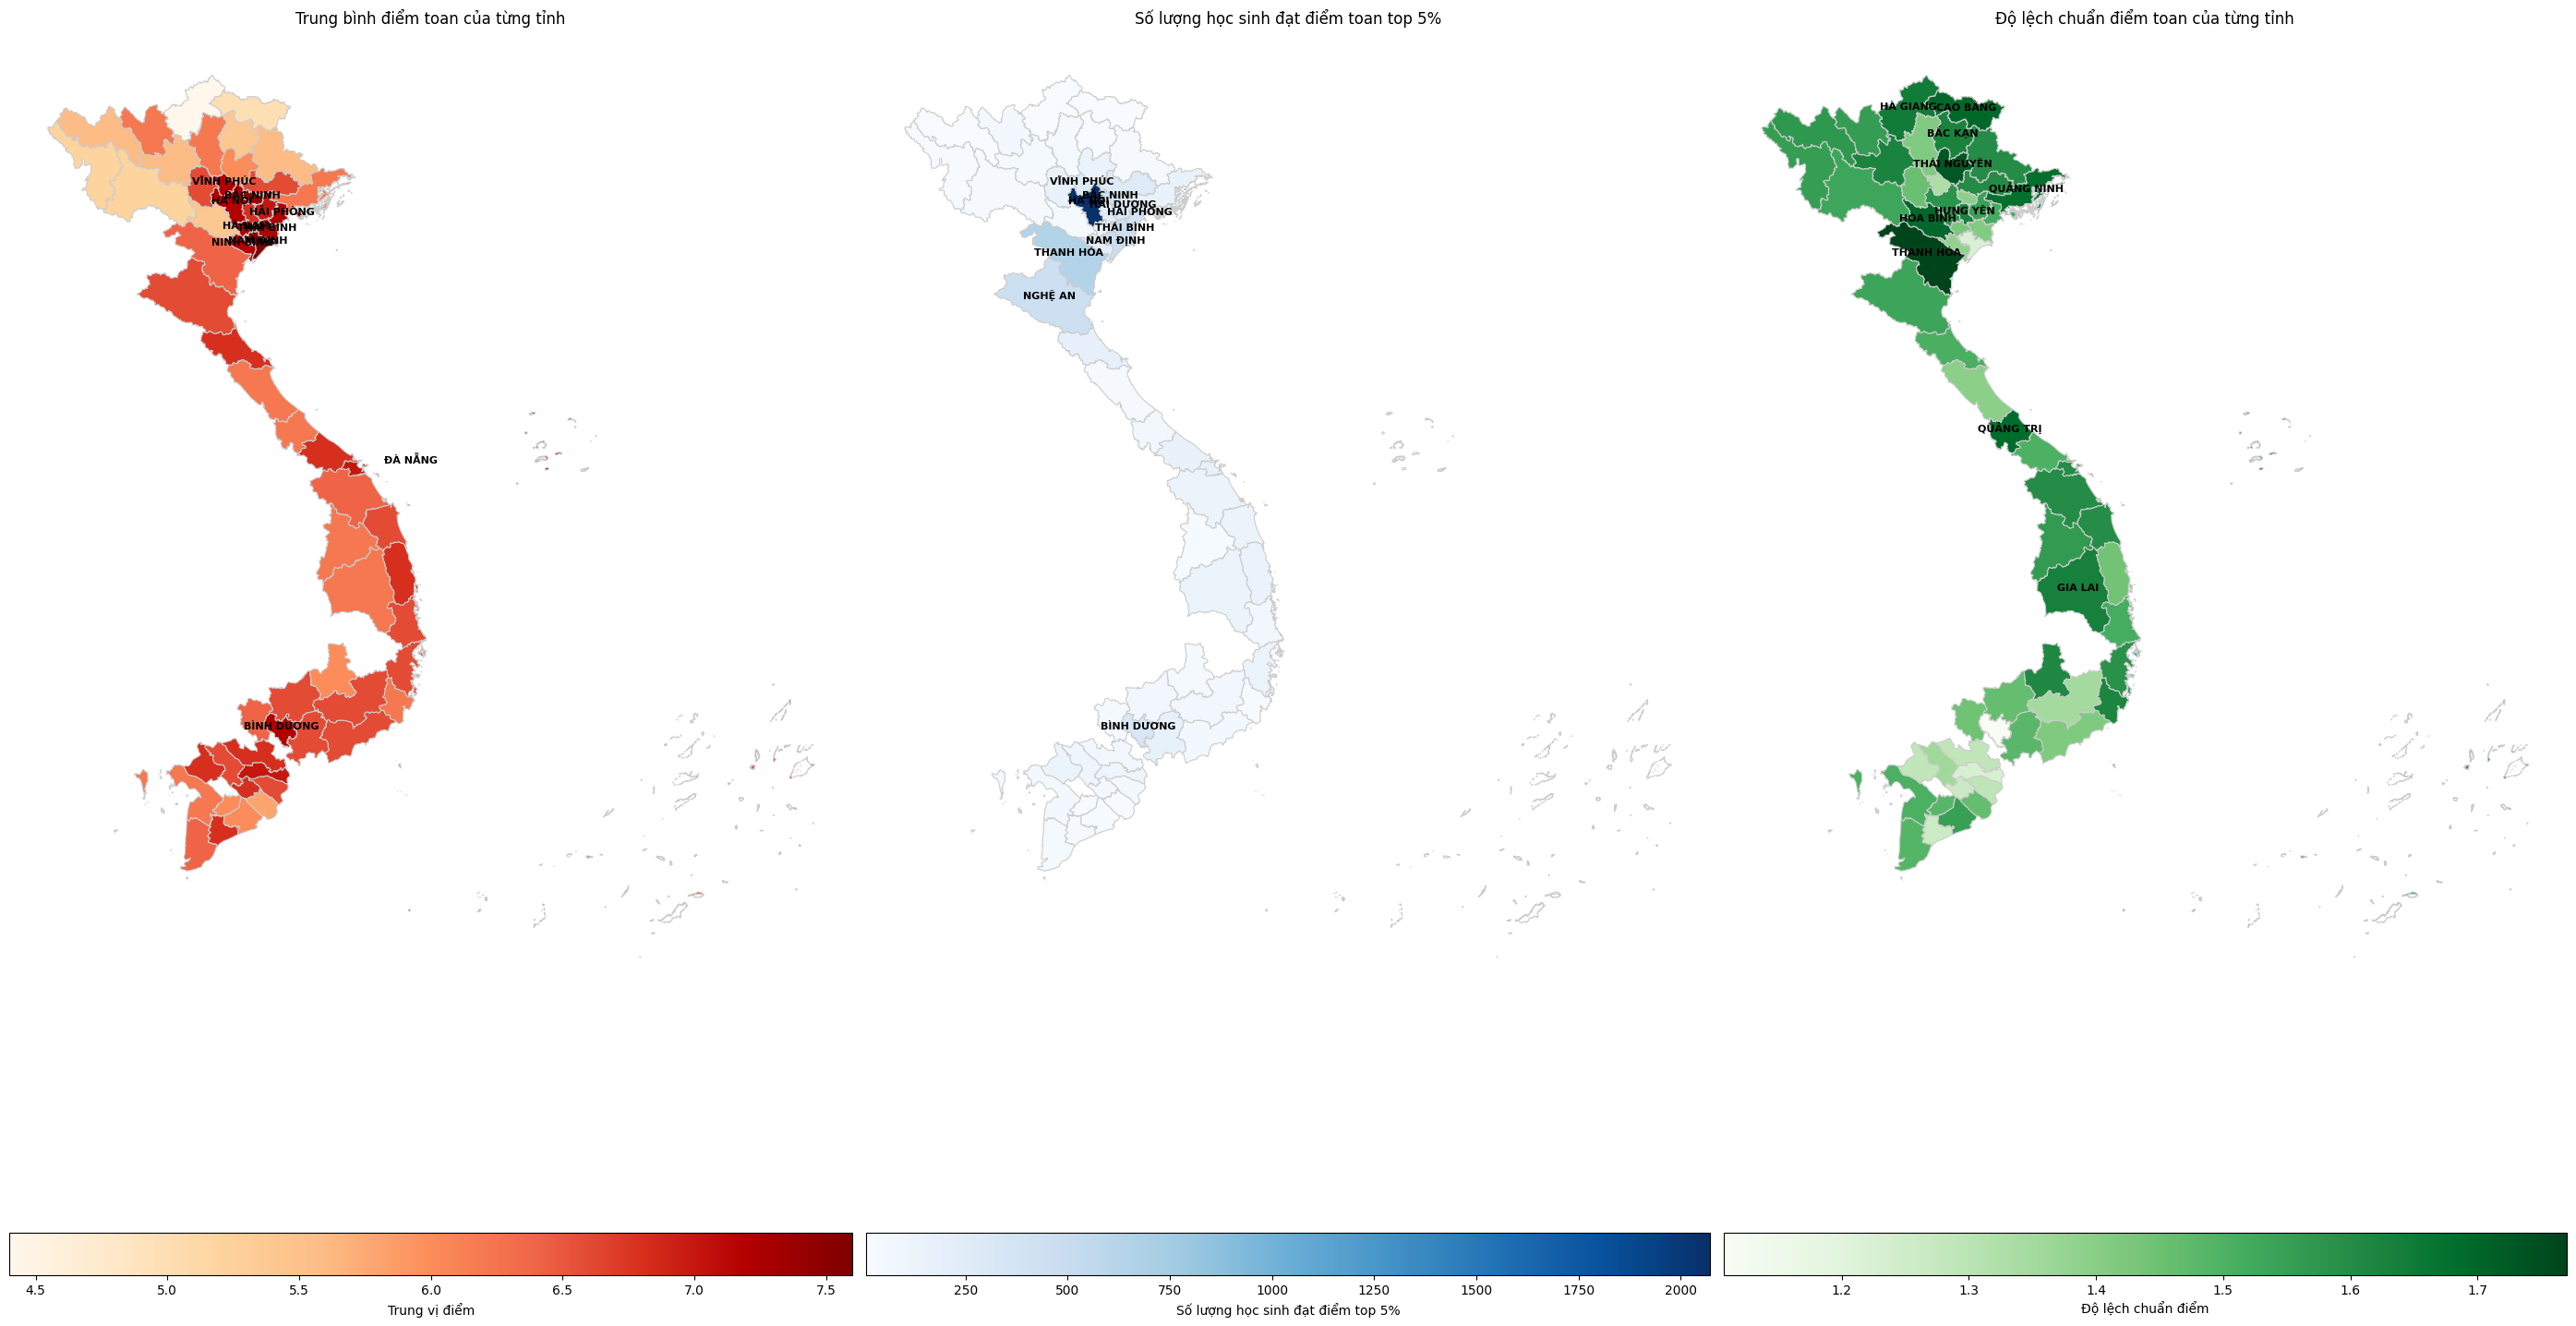

In [ ]:
sub = 'toan'

df = df_data_map_region[df_data_map_region['year'] == '2024']

# Tính trung vị
median_scores = df.groupby('ten_tinh_thanh')[sub].median().reset_index()

# Đổi tên cột bằng cách sử dụng .rename()
median_scores = median_scores.rename(columns={sub: f'median_{sub}'})

# Gộp dữ liệu với df_map
df_map = df_map.merge(median_scores, on='ten_tinh_thanh', how='left')

# Tính số lượng học sinh có điểm >= 8.8
high_scores_count = df[df[sub] > 8.8].groupby('ten_tinh_thanh').size().reset_index(name='high_scores_count')

# Tính độ lệch chuẩn
std_dev_scores = df.groupby('ten_tinh_thanh')[sub].std().reset_index()

# Đổi tên cột bằng cách sử dụng phương thức .rename()
std_dev_scores = std_dev_scores.rename(columns={sub: f'std_dev_{sub}'})

# Gộp dữ liệu với GeoDataFrame
gdf = df_map[['ten_tinh_thanh', 'geometry']]

# Gộp median_scores vào gdf
gdf = gdf.merge(median_scores, on='ten_tinh_thanh', how='left')

# Gộp thêm high_scores_count và std_dev_scores
gdf = gdf.merge(high_scores_count, on='ten_tinh_thanh', how='left')
gdf = gdf.merge(std_dev_scores, on='ten_tinh_thanh', how='left')

# Chọn top 10
top_10_province_median = gdf.nlargest(10, f'median_{sub}')
top_10_province_high_scores = gdf.nlargest(10, 'high_scores_count')
top_10_province_std_dev = gdf.nlargest(10, f'std_dev_{sub}')

# Tạo biểu đồ
fig, axes = plt.subplots(1, 3, figsize=(28, 17))
axes[0].axis('off')
axes[1].axis('off')
axes[2].axis('off')

# Biểu đồ trung vị
gdf.plot(column=f'median_{sub}', ax=axes[0], legend=True, cmap='OrRd',
         legend_kwds={'label': 'Trung vị điểm', 'orientation': 'horizontal'},
         linewidth=0.8, edgecolor='0.8')
axes[0].set_title(f'Trung bình điểm {sub} của từng tỉnh')
# Thêm chú thích cho top 10 trung vị
for idx, row in top_10_province_median.iterrows():
    axes[0].annotate(text=row['ten_tinh_thanh'],
                     xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                     horizontalalignment='center', fontsize=8, color='black', weight='bold')

# Biểu đồ số lượng học sinh đạt điểm top 5%
gdf.plot(column='high_scores_count', ax=axes[1], legend=True, cmap='Blues',
         legend_kwds={'label': 'Số lượng học sinh đạt điểm top 5%', 'orientation': 'horizontal'},
         linewidth=0.8, edgecolor='0.8')
axes[1].set_title(f'Số lượng học sinh đạt điểm {sub} top 5%')

# Thêm chú thích cho top 10 số lượng học sinh đạt điểm cao
for idx, row in top_10_province_high_scores.iterrows():
    axes[1].annotate(text=row['ten_tinh_thanh'],
                     xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                     horizontalalignment='center', fontsize=8, color='black', weight='bold')

# Biểu đồ độ lệch chuẩn
gdf.plot(column=f'std_dev_{sub}', ax=axes[2], legend=True, cmap='Greens',
         legend_kwds={'label': 'Độ lệch chuẩn điểm', 'orientation': 'horizontal'},
         linewidth=0.8, edgecolor='0.8')
axes[2].set_title(f'Độ lệch chuẩn điểm {sub} của từng tỉnh')

# Thêm chú thích cho top 10 độ lệch chuẩn
for idx, row in top_10_province_std_dev.iterrows():
    axes[2].annotate(text=row['ten_tinh_thanh'],
                     xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                     horizontalalignment='center', fontsize=8, color='black', weight='bold')

# Tùy chỉnh bố cục
plt.tight_layout()
plt.show()


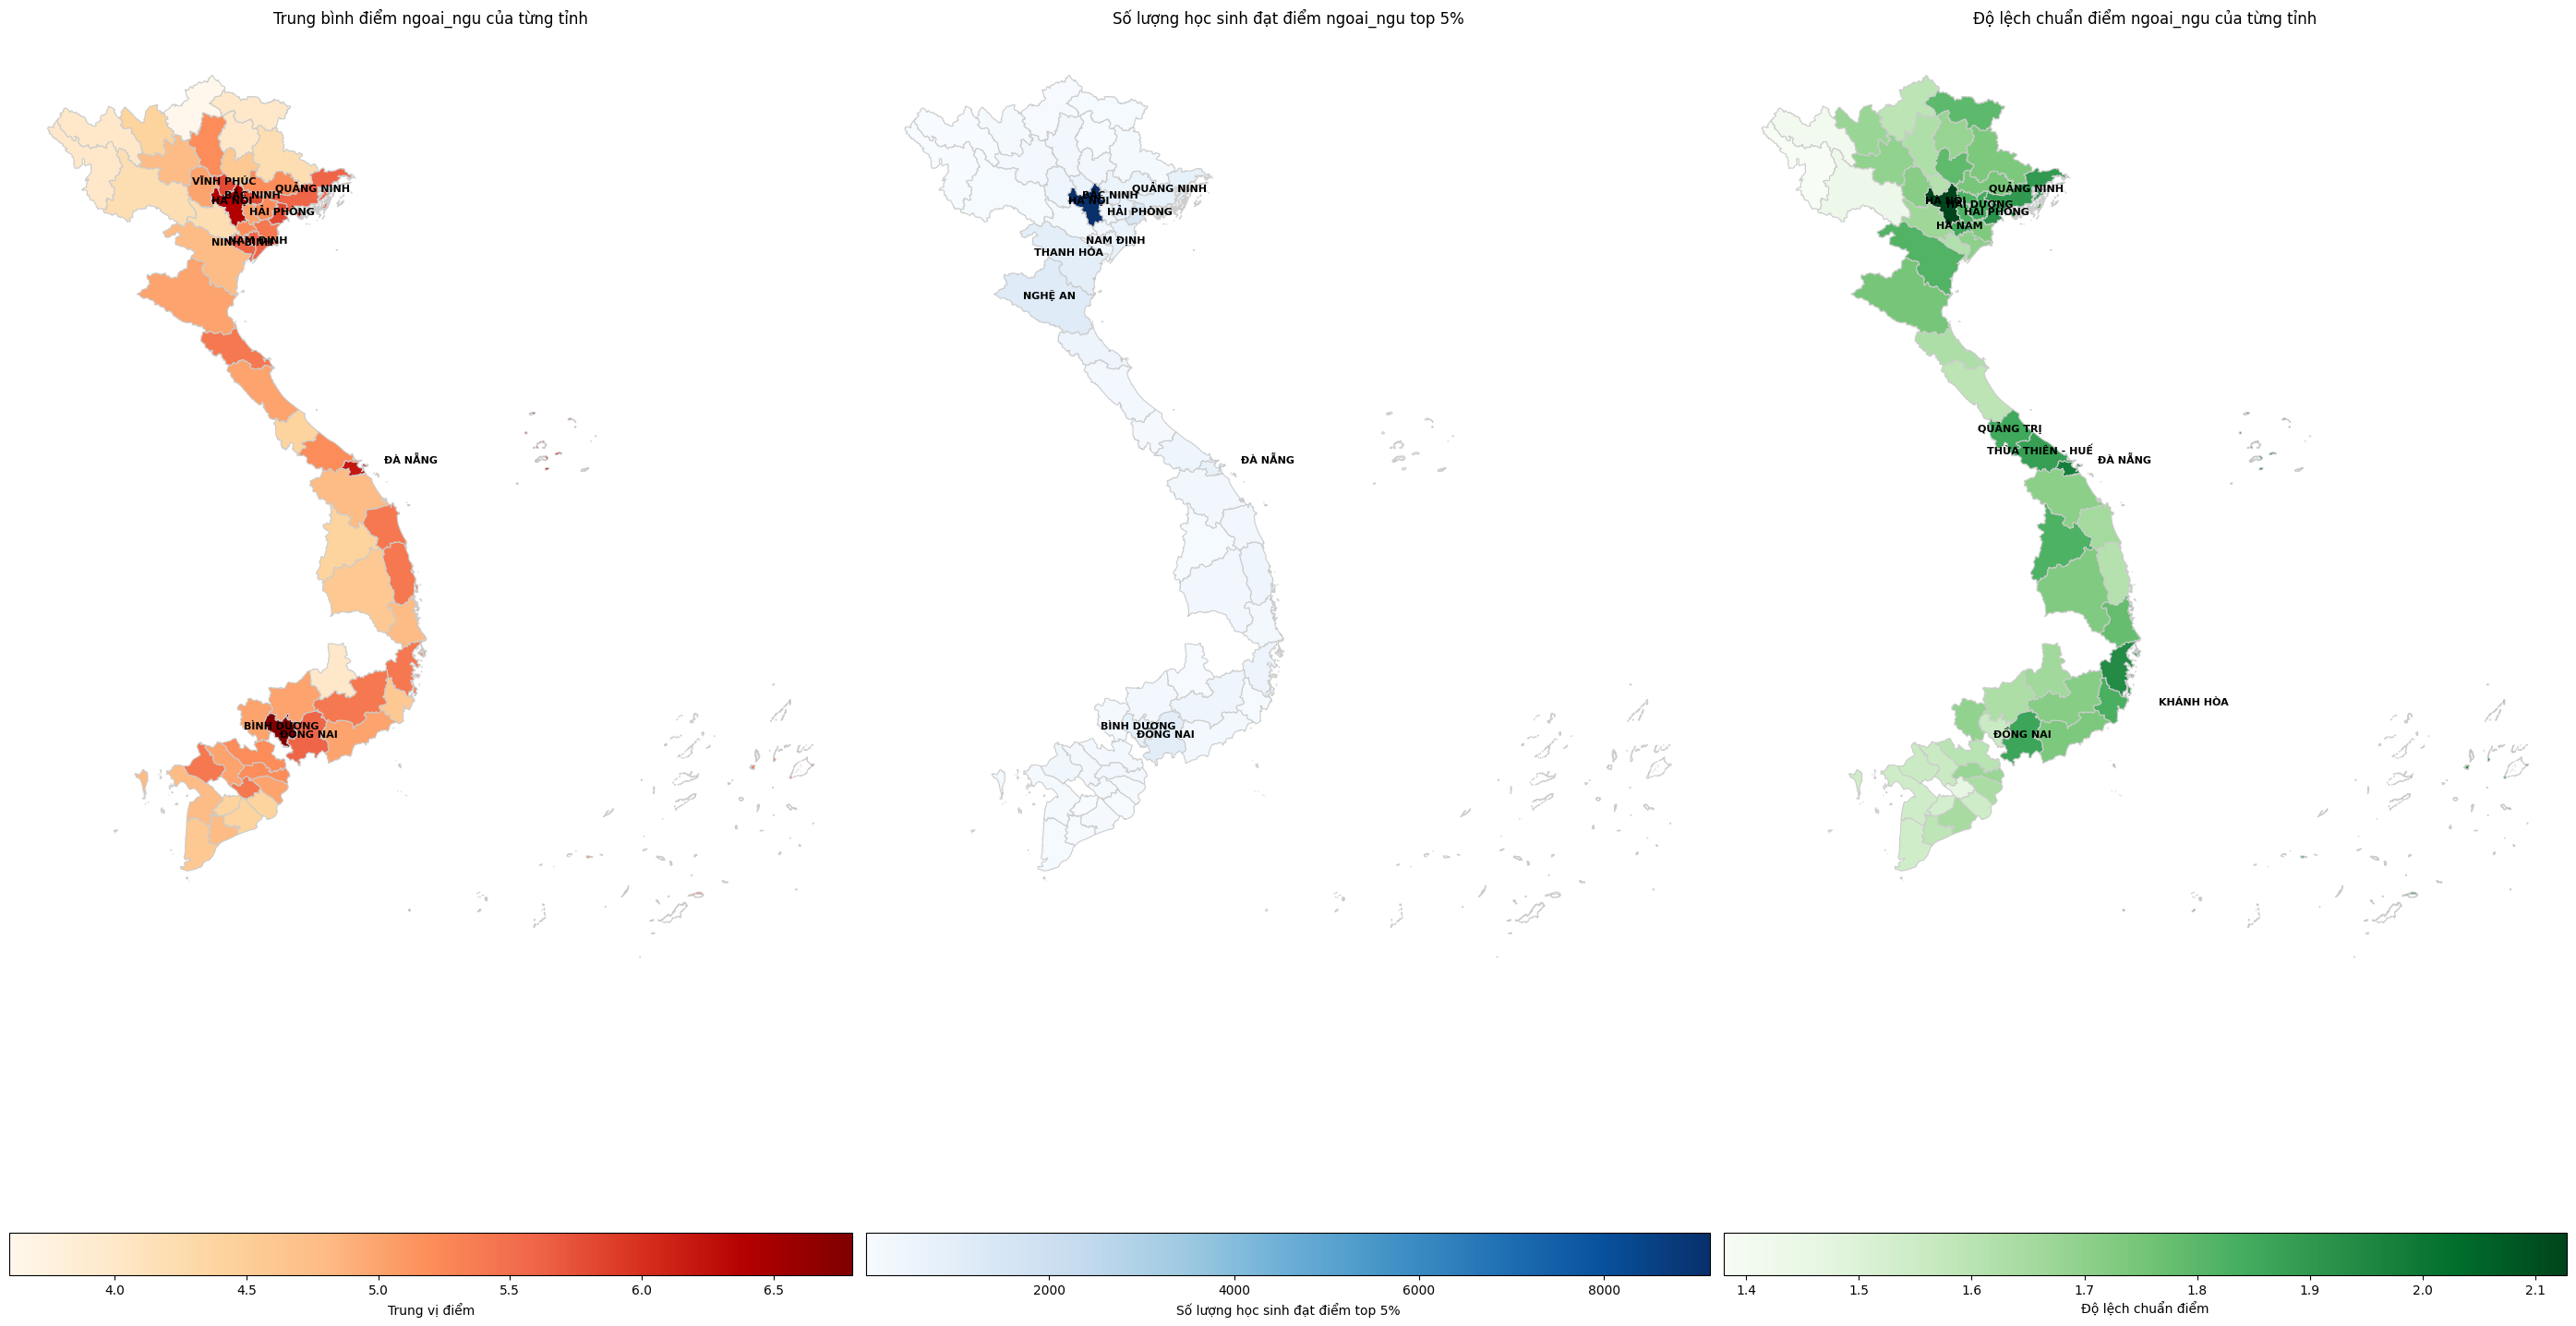

In [ ]:
sub = 'ngoai_ngu'

df = df_data_map_region[df_data_map_region['year'] == '2024']

# Tính trung vị
median_scores = df.groupby('ten_tinh_thanh')[sub].median().reset_index()

# Đổi tên cột bằng cách sử dụng .rename()
median_scores = median_scores.rename(columns={sub: f'median_{sub}'})

# Gộp dữ liệu với df_map
df_map = df_map.merge(median_scores, on='ten_tinh_thanh', how='left')

# Tính số lượng học sinh có điểm >= 8.8
high_scores_count = df[df[sub] > 8.8].groupby('ten_tinh_thanh').size().reset_index(name='high_scores_count')

# Tính độ lệch chuẩn
std_dev_scores = df.groupby('ten_tinh_thanh')[sub].std().reset_index()

# Đổi tên cột bằng cách sử dụng phương thức .rename()
std_dev_scores = std_dev_scores.rename(columns={sub: f'std_dev_{sub}'})

# Gộp dữ liệu với GeoDataFrame
gdf = df_map[['ten_tinh_thanh', 'geometry']]

# Gộp median_scores vào gdf
gdf = gdf.merge(median_scores, on='ten_tinh_thanh', how='left')

# Gộp thêm high_scores_count và std_dev_scores
gdf = gdf.merge(high_scores_count, on='ten_tinh_thanh', how='left')
gdf = gdf.merge(std_dev_scores, on='ten_tinh_thanh', how='left')

# Chọn top 10
top_10_province_median = gdf.nlargest(10, f'median_{sub}')
top_10_province_high_scores = gdf.nlargest(10, 'high_scores_count')
top_10_province_std_dev = gdf.nlargest(10, f'std_dev_{sub}')

# Tạo biểu đồ
fig, axes = plt.subplots(1, 3, figsize=(28, 17))
axes[0].axis('off')
axes[1].axis('off')
axes[2].axis('off')

# Biểu đồ trung vị
gdf.plot(column=f'median_{sub}', ax=axes[0], legend=True, cmap='OrRd',
         legend_kwds={'label': 'Trung vị điểm', 'orientation': 'horizontal'},
         linewidth=0.8, edgecolor='0.8')

# Thêm chú thích cho top 10 trung vị
for idx, row in top_10_province_median.iterrows():
    axes[0].annotate(text=row['ten_tinh_thanh'],
                     xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                     horizontalalignment='center', fontsize=8, color='black', weight='bold')
axes[0].set_title(f'Trung bình điểm {sub} của từng tỉnh')
# Biểu đồ số lượng học sinh đạt điểm top 5%
gdf.plot(column='high_scores_count', ax=axes[1], legend=True, cmap='Blues',
         legend_kwds={'label': 'Số lượng học sinh đạt điểm top 5%', 'orientation': 'horizontal'},
         linewidth=0.8, edgecolor='0.8')
axes[1].set_title(f'Số lượng học sinh đạt điểm {sub} top 5%')

# Thêm chú thích cho top 10 số lượng học sinh đạt điểm cao
for idx, row in top_10_province_high_scores.iterrows():
    axes[1].annotate(text=row['ten_tinh_thanh'],
                     xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                     horizontalalignment='center', fontsize=8, color='black', weight='bold')

# Biểu đồ độ lệch chuẩn
gdf.plot(column=f'std_dev_{sub}', ax=axes[2], legend=True, cmap='Greens',
         legend_kwds={'label': 'Độ lệch chuẩn điểm', 'orientation': 'horizontal'},
         linewidth=0.8, edgecolor='0.8')
axes[2].set_title(f'Độ lệch chuẩn điểm {sub} của từng tỉnh')

# Thêm chú thích cho top 10 độ lệch chuẩn
for idx, row in top_10_province_std_dev.iterrows():
    axes[2].annotate(text=row['ten_tinh_thanh'],
                     xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                     horizontalalignment='center', fontsize=8, color='black', weight='bold')

# Tùy chỉnh bố cục
plt.tight_layout()
plt.show()


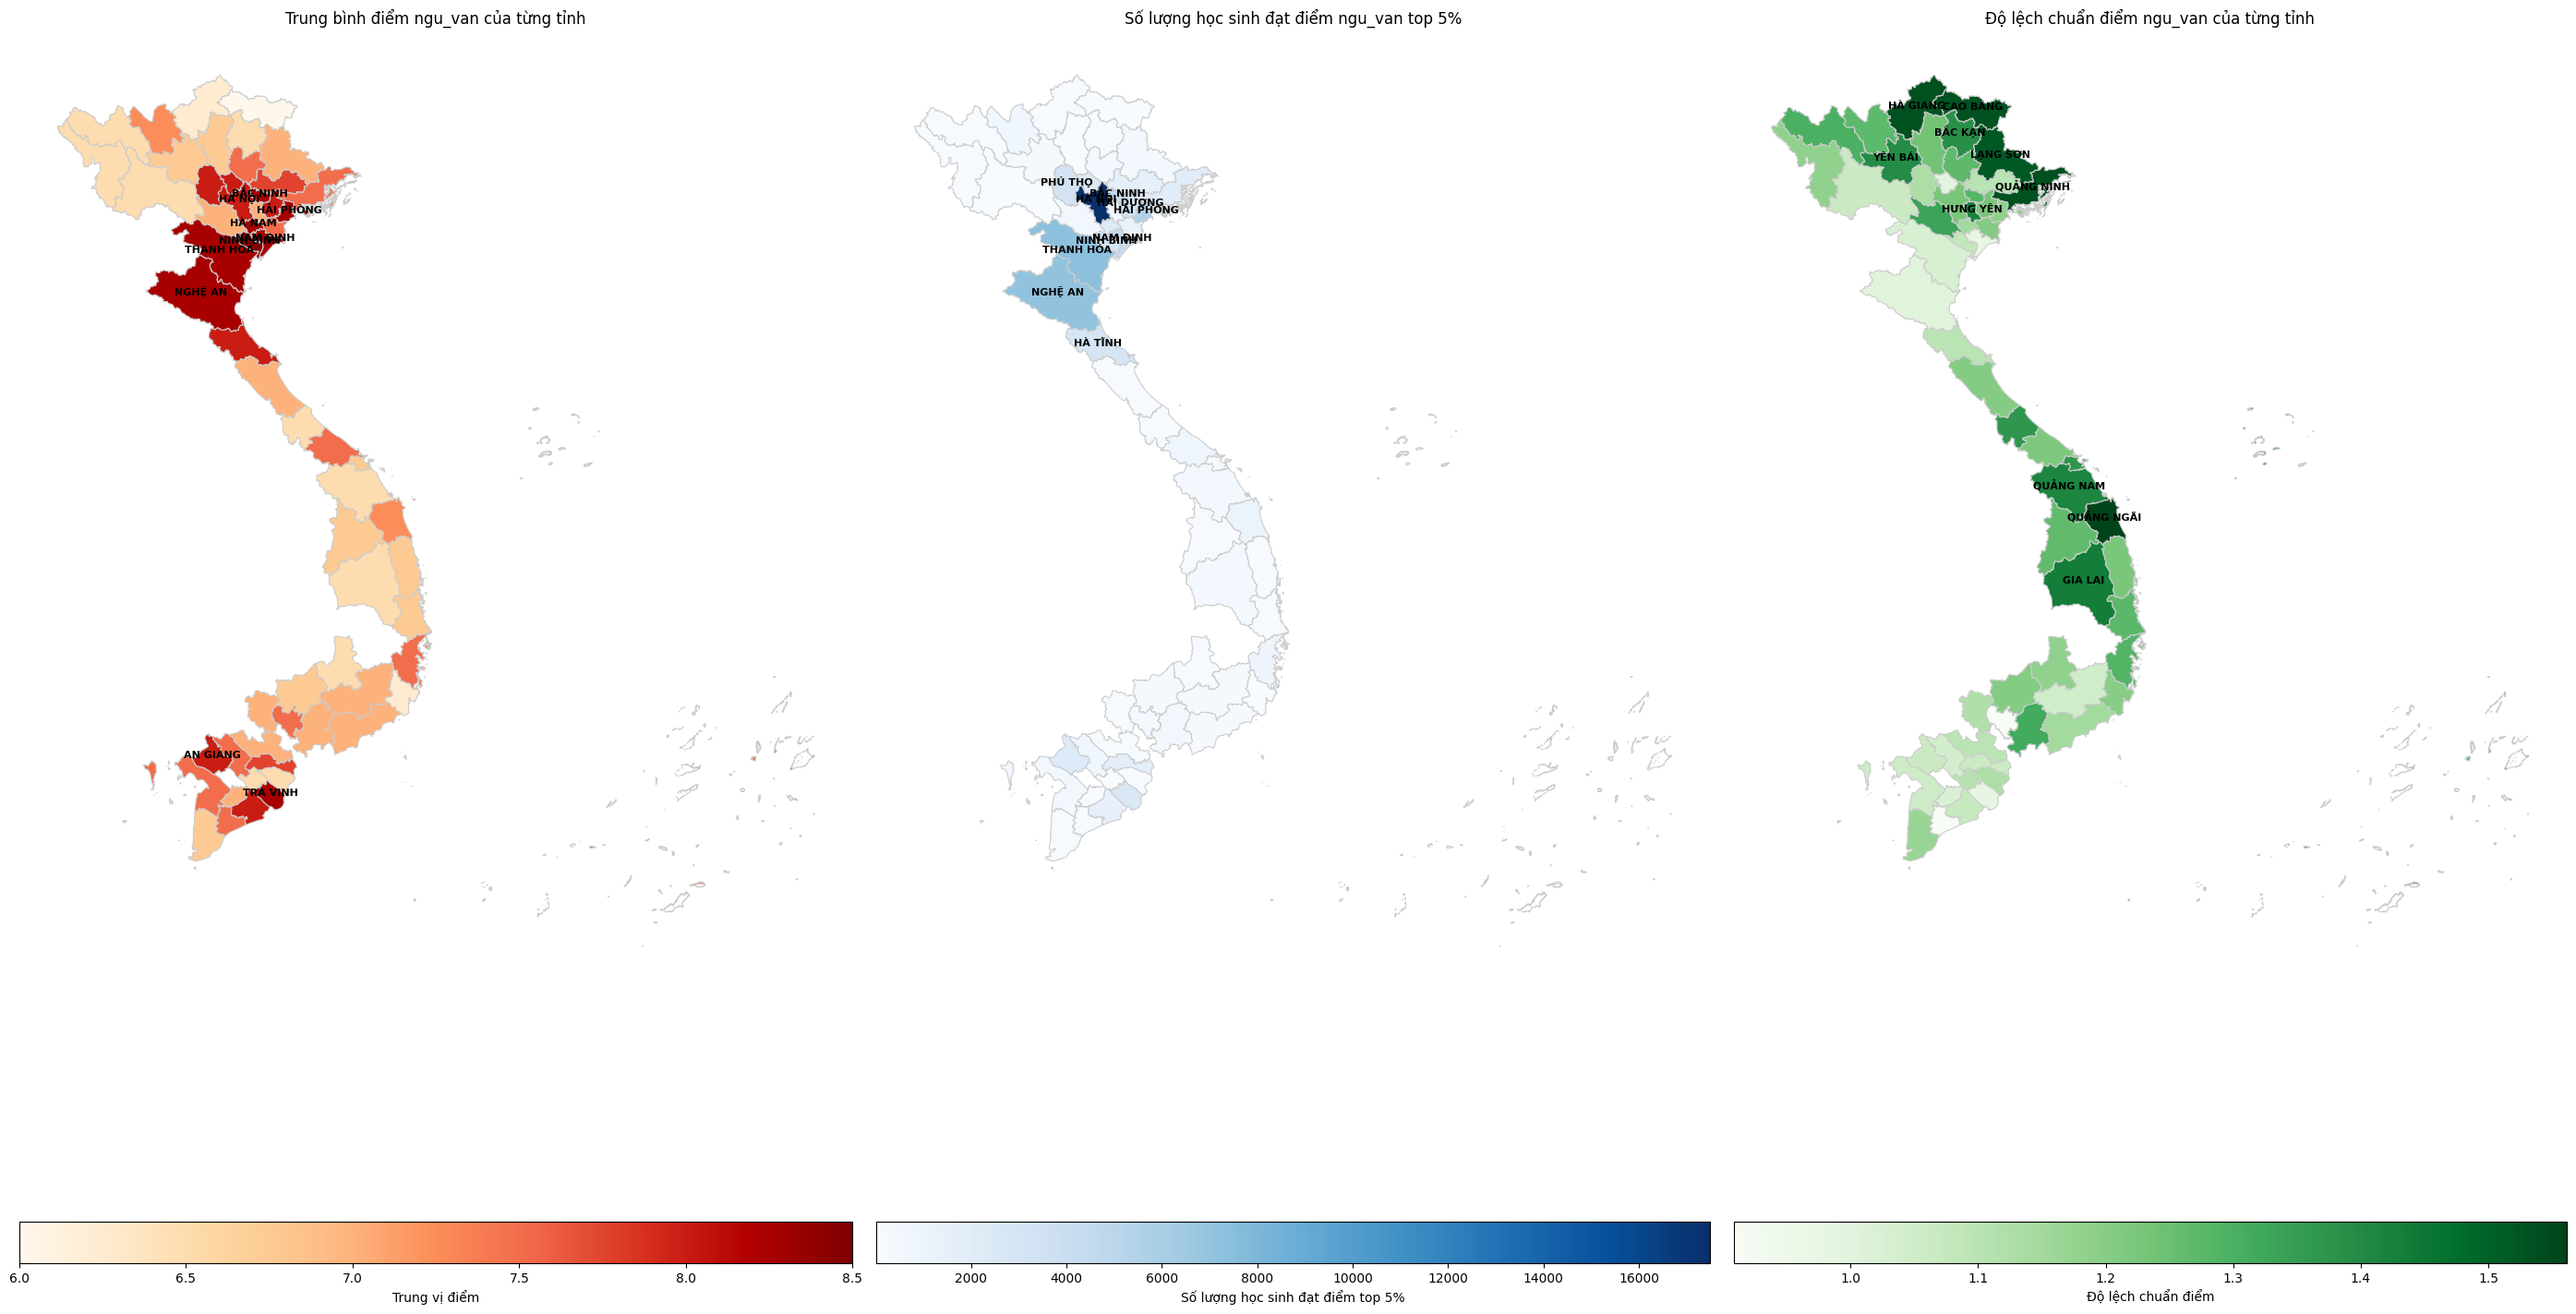

In [ ]:
sub = 'ngu_van'

df = df_data_map_region[df_data_map_region['year'] == '2024']

# Tính trung vị
median_scores = df.groupby('ten_tinh_thanh')[sub].median().reset_index()

# Đổi tên cột bằng cách sử dụng .rename()
median_scores = median_scores.rename(columns={sub: f'median_{sub}'})

# Gộp dữ liệu với df_map
df_map = df_map.merge(median_scores, on='ten_tinh_thanh', how='left')

# Tính số lượng học sinh có điểm >= 8.8
high_scores_count = df[df[sub] > 8.8].groupby('ten_tinh_thanh').size().reset_index(name='high_scores_count')

# Tính độ lệch chuẩn
std_dev_scores = df.groupby('ten_tinh_thanh')[sub].std().reset_index()

# Đổi tên cột bằng cách sử dụng phương thức .rename()
std_dev_scores = std_dev_scores.rename(columns={sub: f'std_dev_{sub}'})

# Gộp dữ liệu với GeoDataFrame
gdf = df_map[['ten_tinh_thanh', 'geometry']]

# Gộp median_scores vào gdf
gdf = gdf.merge(median_scores, on='ten_tinh_thanh', how='left')

# Gộp thêm high_scores_count và std_dev_scores
gdf = gdf.merge(high_scores_count, on='ten_tinh_thanh', how='left')
gdf = gdf.merge(std_dev_scores, on='ten_tinh_thanh', how='left')

# Chọn top 10
top_10_province_median = gdf.nlargest(10, f'median_{sub}')
top_10_province_high_scores = gdf.nlargest(10, 'high_scores_count')
top_10_province_std_dev = gdf.nlargest(10, f'std_dev_{sub}')

# Tạo biểu đồ
fig, axes = plt.subplots(1, 3, figsize=(28, 17))
axes[0].axis('off')
axes[1].axis('off')
axes[2].axis('off')

# Biểu đồ trung vị
gdf.plot(column=f'median_{sub}', ax=axes[0], legend=True, cmap='OrRd',
         legend_kwds={'label': 'Trung vị điểm', 'orientation': 'horizontal'},
         linewidth=0.8, edgecolor='0.8')

axes[0].set_title(f'Trung bình điểm {sub} của từng tỉnh')
# Thêm chú thích cho top 10 trung vị
for idx, row in top_10_province_median.iterrows():
    axes[0].annotate(text=row['ten_tinh_thanh'],
                     xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                     horizontalalignment='center', fontsize=8, color='black', weight='bold')

# Biểu đồ số lượng học sinh đạt điểm top 5%
gdf.plot(column='high_scores_count', ax=axes[1], legend=True, cmap='Blues',
         legend_kwds={'label': 'Số lượng học sinh đạt điểm top 5%', 'orientation': 'horizontal'},
         linewidth=0.8, edgecolor='0.8')
axes[1].set_title(f'Số lượng học sinh đạt điểm {sub} top 5%')

# Thêm chú thích cho top 10 số lượng học sinh đạt điểm cao
for idx, row in top_10_province_high_scores.iterrows():
    axes[1].annotate(text=row['ten_tinh_thanh'],
                     xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                     horizontalalignment='center', fontsize=8, color='black', weight='bold')

# Biểu đồ độ lệch chuẩn
gdf.plot(column=f'std_dev_{sub}', ax=axes[2], legend=True, cmap='Greens',
         legend_kwds={'label': 'Độ lệch chuẩn điểm', 'orientation': 'horizontal'},
         linewidth=0.8, edgecolor='0.8')
axes[2].set_title(f'Độ lệch chuẩn điểm {sub} của từng tỉnh')

# Thêm chú thích cho top 10 độ lệch chuẩn
for idx, row in top_10_province_std_dev.iterrows():
    axes[2].annotate(text=row['ten_tinh_thanh'],
                     xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                     horizontalalignment='center', fontsize=8, color='black', weight='bold')

# Tùy chỉnh bố cục
plt.tight_layout()
plt.show()


In [ ]:
df_filtered[df_filtered['ten_tinh_thanh'] == 'AN GIANG'].head(2)

sbd  toan  ngu_van  ngoai_ngu  vat_li  hoa_hoc  sinh_hoc  \
2708445  51006923   5.8     7.75        5.0     NaN      NaN       NaN   
4789326  51011495   7.2     9.25        7.2     NaN      NaN       NaN   

         lich_su  dia_li  gdcd ma_ngoai_ngu  year ma_tinh ten_tinh_thanh   A  \
2708445      8.0     8.5  8.75         None  2022      51       AN GIANG NaN   
4789326      6.5     8.5  8.25           N1  2024      51       AN GIANG NaN   

          B      C      D  A1  
2708445 NaN  24.25  18.55 NaN  
4789326 NaN  24.25  23.65 NaN

*Visual map of Vietnam geography about scores*

*Consider the median score in Vietnam's provinces, Top 5% of test scores of a subject, Subject standard deviation in the province.
See that the darker the color of the score, the larger and higher the number*

<ipython-input-68-6c9de5725697>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year'] = pd.to_numeric(data['year'], errors='coerce')


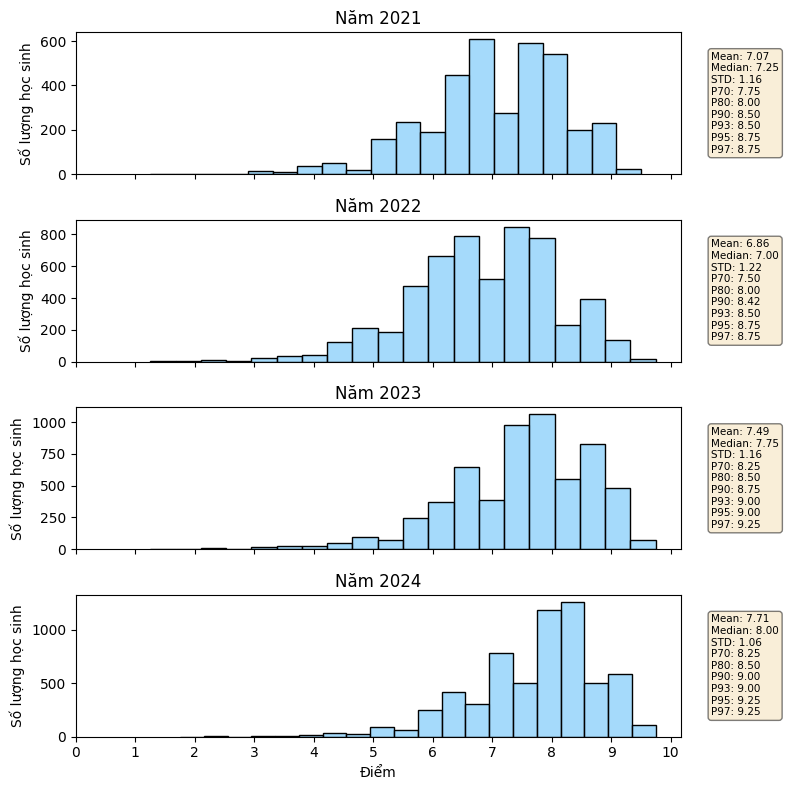

In [ ]:
data = df_filtered[df_filtered['ten_tinh_thanh'] == 'AN GIANG']

sub = 'ngu_van'

data['year'] = pd.to_numeric(data['year'], errors='coerce')

recent_years = data[data['year'].isin(data['year'].unique()[-5:])]

score = list(range(0, 11, 1))

fig, axes = plt.subplots(4, 1, figsize=(8, 8), sharex=True)

# Correcting the variable name
recent_years_sorted = sorted(recent_years['year'].unique())

for i, year in enumerate(recent_years_sorted):
    sns.histplot(data=recent_years[recent_years['year'] == year][sub], bins=20, kde=False, ax=axes[i], edgecolor='black', color='lightskyblue')
    axes[i].set_title(f'Năm {year}')
    axes[i].set_xlabel('Điểm')
    axes[i].set_ylabel('Số lượng học sinh')

    year_data = recent_years[recent_years['year'] == year][sub].dropna()
    mean = year_data.mean()
    median = year_data.median()
    std_dev = year_data.std()

    p70 = year_data.quantile(0.7)
    p80 = year_data.quantile(0.8)
    p90 = year_data.quantile(0.9)
    p93 = year_data.quantile(0.93)
    p95 = year_data.quantile(0.95)
    p97 = year_data.quantile(0.97)

    text_str = (f'Mean: {mean:.2f}\nMedian: {median:.2f}\nSTD: {std_dev:.2f}\n'
                f'P70: {p70:.2f}\nP80: {p80:.2f}\n'
                f'P90: {p90:.2f}\nP93: {p93:.2f}\n'
                f'P95: {p95:.2f}\nP97: {p97:.2f}')
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

    # Using correct axes reference
    axes[i].text(1.05, 0.5, text_str, transform=axes[i].transAxes, fontsize=7.5,
                 verticalalignment='center', horizontalalignment='left', bbox=props)

# Set x-ticks for scores
plt.xticks(score)

plt.tight_layout()
plt.show()


*Conclusion: The benchmark score in 2024 will increase by about 0.25 - 0.5 benchmark points compared to last year.*